In [1]:
#Now that our EDA and preliminary feature engineering is over, we would want to choose between which
#features to keep and which ML Model to train on. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
data = pd.read_csv("ModTrain.csv")

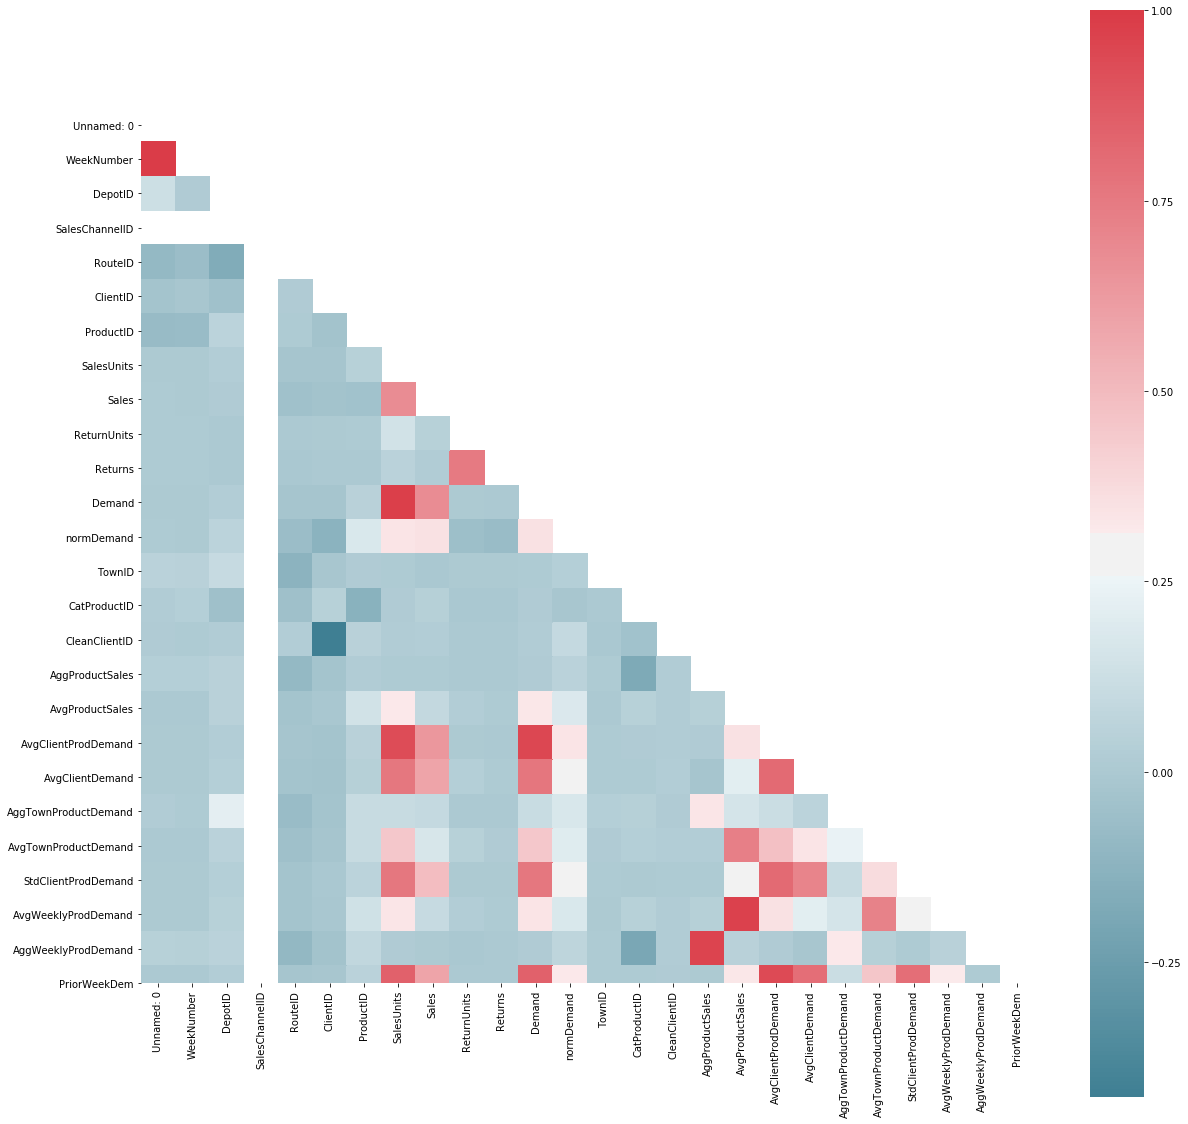

In [11]:
fig, axes = plt.subplots(figsize=(20,20))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), ax=axes,mask=mask, square=True, cmap=cmap)

In [12]:
#The plan is to keep the less correlated features and remove highly correlated ones. But we will do that after running the lgbm
#once on all features just to compare the models. 
#Features which are out ->
#Sales,SalesUnits,Ret,RetUnits, Demand, Average Client Demand, 
#AggProductSales,AvgProductSales 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528498 entries, 0 to 528497
Data columns (total 26 columns):
Unnamed: 0              528498 non-null int64
WeekNumber              528498 non-null int64
DepotID                 528498 non-null int64
SalesChannelID          528498 non-null int64
RouteID                 528498 non-null int64
ClientID                528498 non-null int64
ProductID               528498 non-null float64
SalesUnits              528498 non-null int64
Sales                   528498 non-null float64
ReturnUnits             528498 non-null int64
Returns                 528498 non-null float64
Demand                  528498 non-null int64
normDemand              528498 non-null float64
TownID                  528498 non-null int64
CatProductID            528498 non-null int64
CleanClientID           528498 non-null float64
AggProductSales         528498 non-null int64
AvgProductSales         528498 non-null float64
AvgClientProdDemand     528498 non-null float64
A

In [79]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Imputer
from sklearn.model_selection import cross_val_score, cross_val_predict

In [71]:
data.drop(["Unnamed: 0","SalesChannelID","SalesUnits","Sales","ReturnUnits","Returns","Demand"], axis=1, inplace=True)

In [72]:
data = data[data['WeekNumber']>3].copy()
X_train = data[data['WeekNumber'] != 9].copy()
y_train = X_train['normDemand']
X_test = data[data['WeekNumber'] == 9].copy()
y_test = X_test['normDemand']
X_train.drop(["normDemand"],axis=1, inplace=True)
X_test.drop(["normDemand"],axis=1, inplace=True)

In [73]:
hyper_params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'l1'],
    'n_estimators' : 100
}
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_train, y_train),(X_test, y_test)],
        eval_metric=['l1','l2'],
        categorical_feature = ['TownID','CatProductID','CleanClientID'],
        verbose = True)


C:\Users\sablo\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['CatProductID', 'CleanClientID', 'TownID']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	training's l2: 0.199707	training's l1: 0.361348	valid_1's l2: 0.202737	valid_1's l1: 0.365152
[2]	training's l2: 0.169369	training's l1: 0.332128	valid_1's l2: 0.171297	valid_1's l1: 0.335034
[3]	training's l2: 0.144736	training's l1: 0.306301	valid_1's l2: 0.145812	valid_1's l1: 0.308372
[4]	training's l2: 0.12468	training's l1: 0.283389	valid_1's l2: 0.125031	valid_1's l1: 0.284635
[5]	training's l2: 0.108414	training's l1: 0.263242	valid_1's l2: 0.108166	valid_1's l1: 0.263731
[6]	training's l2: 0.0951422	training's l1: 0.245375	valid_1's l2: 0.0943637	valid_1's l1: 0.245103
[7]	training's l2: 0.0843472	training's l1: 0.229545	valid_1's l2: 0.083163	valid_1's l1: 0.228596
[8]	training's l2: 0.0755417	training's l1: 0.215701	valid_1's l2: 0.0740088	valid_1's l1: 0.214073
[9]	training's l2: 0.0683595	training's l1: 0.203523	valid_1's l2: 0.0665442	valid_1's l1: 0.201234
[10]	training's l2: 0.0624907	training's l1: 0.192828	valid_1's l2: 0.0604113	valid_1's l1: 0.189913
[11]	traini

[86]	training's l2: 0.0328007	training's l1: 0.114905	valid_1's l2: 0.0331128	valid_1's l1: 0.108933
[87]	training's l2: 0.0327838	training's l1: 0.114889	valid_1's l2: 0.0331322	valid_1's l1: 0.108965
[88]	training's l2: 0.0327451	training's l1: 0.114849	valid_1's l2: 0.0331536	valid_1's l1: 0.109036
[89]	training's l2: 0.0327192	training's l1: 0.114802	valid_1's l2: 0.0331682	valid_1's l1: 0.109044
[90]	training's l2: 0.0326961	training's l1: 0.114763	valid_1's l2: 0.0331865	valid_1's l1: 0.109064
[91]	training's l2: 0.0326736	training's l1: 0.114725	valid_1's l2: 0.0331889	valid_1's l1: 0.109068
[92]	training's l2: 0.0326559	training's l1: 0.114714	valid_1's l2: 0.0332008	valid_1's l1: 0.109091
[93]	training's l2: 0.032612	training's l1: 0.114629	valid_1's l2: 0.0332138	valid_1's l1: 0.109103
[94]	training's l2: 0.0325954	training's l1: 0.11461	valid_1's l2: 0.0332216	valid_1's l1: 0.10911
[95]	training's l2: 0.0325466	training's l1: 0.114577	valid_1's l2: 0.0332404	valid_1's l1: 0.

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              metric=['l2', 'l1'], min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [77]:
pred = gbm.predict(X_test)

In [80]:
# Basic RMSLE
print('The rmse of prediction is:', round(mean_squared_error(pred, y_test) ** 0.5, 5))

The rmse of prediction is: 0.18243


In [25]:
#We got a significant improvement in rmse (0.37 -> 0.18) after introducing the additional features. This is before we have
#removed the collinear features. 
#Next step -> best feature selection and GridSearchCV.

In [32]:
sum=0
for i in gbm.feature_importances_:
    sum += i

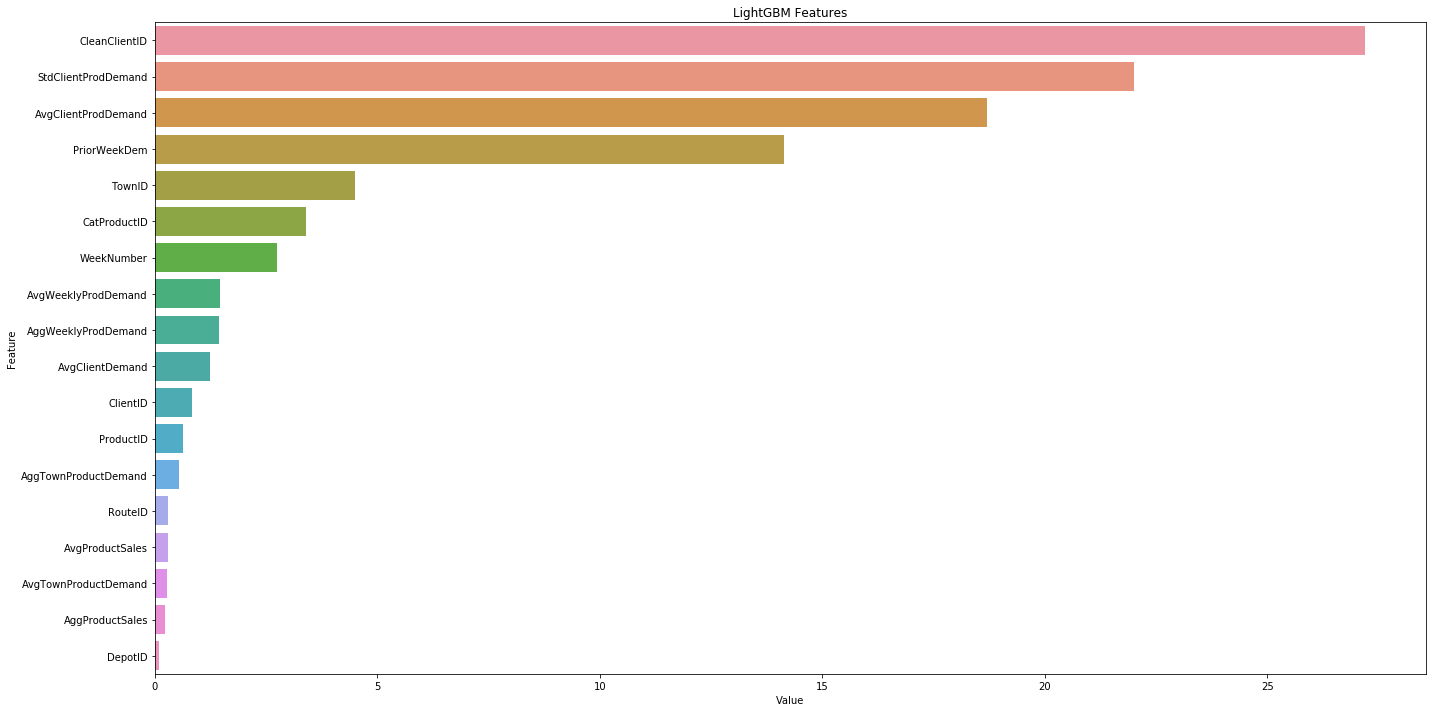

In [33]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_*(100/sum),X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [54]:
#We see that feature importance of DepotID,AggProductSales, AvgProductSales is quite less.

In [ ]:
#Another observation is that when we use target variable as "Demand" instead of normDemand we get significantly 
#poorer results, this reiterates that standardizing the target variable is important.

In [84]:
#RandomizedSearchCV on the model
from scipy.stats import uniform, randint
from sklearn.model_selection import KFold, RandomizedSearchCV


params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(5, 12), # default 3
    "n_estimators": randint(100, 200), # default 100
    "subsample": uniform(0.6, 0.4),
    "num_leaves": randint(30,60)
}
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

search = RandomizedSearchCV(lgb.LGBMRegressor(objective="Regression",metric= ['l2', 'l1']), param_distributions=params, random_state=42, n_iter=20, cv=kfold, verbose=1, n_jobs=1, return_train_score=True)


In [85]:
search.fit(X_train, y_train,eval_set=[(X_train, y_train)],
        eval_metric=['l1','l2'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[1]	valid_0's l2: 0.131547	valid_0's l1: 0.291823
[2]	valid_0's l2: 0.0949718	valid_0's l1: 0.243747
[3]	valid_0's l2: 0.0649238	valid_0's l1: 0.196541
[4]	valid_0's l2: 0.0506598	valid_0's l1: 0.168102
[5]	valid_0's l2: 0.0433801	valid_0's l1: 0.150328
[6]	valid_0's l2: 0.0397131	valid_0's l1: 0.139487
[7]	valid_0's l2: 0.0377893	valid_0's l1: 0.132589
[8]	valid_0's l2: 0.0367264	valid_0's l1: 0.127708
[9]	valid_0's l2: 0.0361874	valid_0's l1: 0.124881
[10]	valid_0's l2: 0.0360183	valid_0's l1: 0.124345
[11]	valid_0's l2: 0.035686	valid_0's l1: 0.122787
[12]	valid_0's l2: 0.0355794	valid_0's l1: 0.122476
[13]	valid_0's l2: 0.0352864	valid_0's l1: 0.121233
[14]	valid_0's l2: 0.0351397	valid_0's l1: 0.120423
[15]	valid_0's l2: 0.0349878	valid_0's l1: 0.11968
[16]	valid_0's l2: 0.0348538	valid_0's l1: 0.119204
[17]	valid_0's l2: 0.0347899	valid_0's l1: 0.119091
[18]	valid_0's l2: 0.034694	valid_0's l1: 0.118744
[19]	valid_0's l2: 0.0345824	valid_0's l1: 0.118497
[20]	valid_0's l2: 0.0345

[161]	valid_0's l2: 0.0310332	valid_0's l1: 0.11249
[162]	valid_0's l2: 0.0310142	valid_0's l1: 0.112461
[163]	valid_0's l2: 0.0310105	valid_0's l1: 0.112456
[164]	valid_0's l2: 0.0309867	valid_0's l1: 0.112425
[165]	valid_0's l2: 0.0309728	valid_0's l1: 0.112408
[166]	valid_0's l2: 0.0309611	valid_0's l1: 0.112385
[167]	valid_0's l2: 0.0309379	valid_0's l1: 0.112342
[168]	valid_0's l2: 0.030915	valid_0's l1: 0.112315
[169]	valid_0's l2: 0.0308856	valid_0's l1: 0.112275
[170]	valid_0's l2: 0.0308763	valid_0's l1: 0.112263
[171]	valid_0's l2: 0.0308432	valid_0's l1: 0.112212
[1]	valid_0's l2: 0.131538	valid_0's l1: 0.291628
[2]	valid_0's l2: 0.0948954	valid_0's l1: 0.243407
[3]	valid_0's l2: 0.0649346	valid_0's l1: 0.196627
[4]	valid_0's l2: 0.0507394	valid_0's l1: 0.168298
[5]	valid_0's l2: 0.0434829	valid_0's l1: 0.150631
[6]	valid_0's l2: 0.0398086	valid_0's l1: 0.139805
[7]	valid_0's l2: 0.0378329	valid_0's l1: 0.13268
[8]	valid_0's l2: 0.0367975	valid_0's l1: 0.128225
[9]	valid_0's

[157]	valid_0's l2: 0.0310511	valid_0's l1: 0.112825
[158]	valid_0's l2: 0.0310355	valid_0's l1: 0.112799
[159]	valid_0's l2: 0.0310188	valid_0's l1: 0.112775
[160]	valid_0's l2: 0.0309997	valid_0's l1: 0.112756
[161]	valid_0's l2: 0.0309886	valid_0's l1: 0.112739
[162]	valid_0's l2: 0.03096	valid_0's l1: 0.112717
[163]	valid_0's l2: 0.0309345	valid_0's l1: 0.112675
[164]	valid_0's l2: 0.0309101	valid_0's l1: 0.112622
[165]	valid_0's l2: 0.0308903	valid_0's l1: 0.112601
[166]	valid_0's l2: 0.0308765	valid_0's l1: 0.112581
[167]	valid_0's l2: 0.0308592	valid_0's l1: 0.112548
[168]	valid_0's l2: 0.0308451	valid_0's l1: 0.112534
[169]	valid_0's l2: 0.0308366	valid_0's l1: 0.112519
[170]	valid_0's l2: 0.0308251	valid_0's l1: 0.112504
[171]	valid_0's l2: 0.0308038	valid_0's l1: 0.112477
[1]	valid_0's l2: 0.131602	valid_0's l1: 0.291768
[2]	valid_0's l2: 0.095082	valid_0's l1: 0.243847
[3]	valid_0's l2: 0.0649864	valid_0's l1: 0.196626
[4]	valid_0's l2: 0.0507395	valid_0's l1: 0.168123
[5]	v

[144]	valid_0's l2: 0.0313574	valid_0's l1: 0.113205
[145]	valid_0's l2: 0.0313389	valid_0's l1: 0.11318
[146]	valid_0's l2: 0.0313333	valid_0's l1: 0.11317
[147]	valid_0's l2: 0.0313146	valid_0's l1: 0.113148
[148]	valid_0's l2: 0.0313056	valid_0's l1: 0.113147
[149]	valid_0's l2: 0.0312968	valid_0's l1: 0.113134
[150]	valid_0's l2: 0.0312887	valid_0's l1: 0.113119
[151]	valid_0's l2: 0.0312831	valid_0's l1: 0.113113
[152]	valid_0's l2: 0.0312607	valid_0's l1: 0.113082
[153]	valid_0's l2: 0.0312344	valid_0's l1: 0.113046
[154]	valid_0's l2: 0.0312155	valid_0's l1: 0.113015
[155]	valid_0's l2: 0.0311958	valid_0's l1: 0.112981
[156]	valid_0's l2: 0.0311784	valid_0's l1: 0.112955
[157]	valid_0's l2: 0.0311622	valid_0's l1: 0.112915
[158]	valid_0's l2: 0.0311408	valid_0's l1: 0.112891
[159]	valid_0's l2: 0.0311308	valid_0's l1: 0.112863
[160]	valid_0's l2: 0.0311189	valid_0's l1: 0.112841
[161]	valid_0's l2: 0.0310911	valid_0's l1: 0.112753
[162]	valid_0's l2: 0.0310844	valid_0's l1: 0.11

[133]	valid_0's l2: 0.0315195	valid_0's l1: 0.113114
[134]	valid_0's l2: 0.0314845	valid_0's l1: 0.113073
[135]	valid_0's l2: 0.0314662	valid_0's l1: 0.113049
[136]	valid_0's l2: 0.0314355	valid_0's l1: 0.113006
[137]	valid_0's l2: 0.0314206	valid_0's l1: 0.112988
[138]	valid_0's l2: 0.0314042	valid_0's l1: 0.112968
[139]	valid_0's l2: 0.0313818	valid_0's l1: 0.112917
[140]	valid_0's l2: 0.0313517	valid_0's l1: 0.112889
[141]	valid_0's l2: 0.0313333	valid_0's l1: 0.112854
[142]	valid_0's l2: 0.0313101	valid_0's l1: 0.112821
[143]	valid_0's l2: 0.0312921	valid_0's l1: 0.112793
[144]	valid_0's l2: 0.0312648	valid_0's l1: 0.112728
[145]	valid_0's l2: 0.0312534	valid_0's l1: 0.112706
[146]	valid_0's l2: 0.0312367	valid_0's l1: 0.112679
[147]	valid_0's l2: 0.03121	valid_0's l1: 0.112617
[148]	valid_0's l2: 0.0311975	valid_0's l1: 0.112608
[149]	valid_0's l2: 0.0311809	valid_0's l1: 0.11258
[150]	valid_0's l2: 0.0311712	valid_0's l1: 0.112566
[151]	valid_0's l2: 0.0311526	valid_0's l1: 0.112

[124]	valid_0's l2: 0.0315426	valid_0's l1: 0.113128
[125]	valid_0's l2: 0.0315293	valid_0's l1: 0.113124
[126]	valid_0's l2: 0.0315252	valid_0's l1: 0.113121
[127]	valid_0's l2: 0.0315086	valid_0's l1: 0.113093
[128]	valid_0's l2: 0.0314908	valid_0's l1: 0.113071
[129]	valid_0's l2: 0.0314843	valid_0's l1: 0.11306
[130]	valid_0's l2: 0.0314559	valid_0's l1: 0.113005
[131]	valid_0's l2: 0.031438	valid_0's l1: 0.112979
[132]	valid_0's l2: 0.0314235	valid_0's l1: 0.11296
[133]	valid_0's l2: 0.0313914	valid_0's l1: 0.112921
[134]	valid_0's l2: 0.0313565	valid_0's l1: 0.11287
[135]	valid_0's l2: 0.031325	valid_0's l1: 0.112833
[136]	valid_0's l2: 0.0313009	valid_0's l1: 0.112799
[137]	valid_0's l2: 0.0312913	valid_0's l1: 0.112781
[138]	valid_0's l2: 0.0312713	valid_0's l1: 0.112755
[139]	valid_0's l2: 0.0312465	valid_0's l1: 0.112731
[140]	valid_0's l2: 0.0312259	valid_0's l1: 0.112694
[141]	valid_0's l2: 0.0312039	valid_0's l1: 0.112665
[142]	valid_0's l2: 0.0311797	valid_0's l1: 0.11262

[111]	valid_0's l2: 0.0342497	valid_0's l1: 0.117718
[112]	valid_0's l2: 0.03424	valid_0's l1: 0.117656
[113]	valid_0's l2: 0.0342258	valid_0's l1: 0.117594
[114]	valid_0's l2: 0.0342129	valid_0's l1: 0.117582
[115]	valid_0's l2: 0.0341978	valid_0's l1: 0.117537
[116]	valid_0's l2: 0.0341867	valid_0's l1: 0.117522
[117]	valid_0's l2: 0.0341754	valid_0's l1: 0.11748
[118]	valid_0's l2: 0.0341597	valid_0's l1: 0.117448
[119]	valid_0's l2: 0.0341464	valid_0's l1: 0.117405
[120]	valid_0's l2: 0.0341331	valid_0's l1: 0.117367
[121]	valid_0's l2: 0.0341249	valid_0's l1: 0.117328
[122]	valid_0's l2: 0.0341165	valid_0's l1: 0.117288
[123]	valid_0's l2: 0.034103	valid_0's l1: 0.117261
[124]	valid_0's l2: 0.0340935	valid_0's l1: 0.117226
[125]	valid_0's l2: 0.0340843	valid_0's l1: 0.117199
[126]	valid_0's l2: 0.0340767	valid_0's l1: 0.117165
[127]	valid_0's l2: 0.034063	valid_0's l1: 0.117131
[128]	valid_0's l2: 0.03405	valid_0's l1: 0.117102
[129]	valid_0's l2: 0.0340409	valid_0's l1: 0.117067


[82]	valid_0's l2: 0.0347411	valid_0's l1: 0.119664
[83]	valid_0's l2: 0.0347149	valid_0's l1: 0.119538
[84]	valid_0's l2: 0.0346864	valid_0's l1: 0.119428
[85]	valid_0's l2: 0.0346589	valid_0's l1: 0.119325
[86]	valid_0's l2: 0.0346428	valid_0's l1: 0.119299
[87]	valid_0's l2: 0.0346219	valid_0's l1: 0.119198
[88]	valid_0's l2: 0.0345988	valid_0's l1: 0.119095
[89]	valid_0's l2: 0.0345768	valid_0's l1: 0.119014
[90]	valid_0's l2: 0.0345649	valid_0's l1: 0.118919
[91]	valid_0's l2: 0.0345421	valid_0's l1: 0.118835
[92]	valid_0's l2: 0.0345281	valid_0's l1: 0.118819
[93]	valid_0's l2: 0.0345099	valid_0's l1: 0.118749
[94]	valid_0's l2: 0.0344846	valid_0's l1: 0.118678
[95]	valid_0's l2: 0.0344628	valid_0's l1: 0.118607
[96]	valid_0's l2: 0.0344484	valid_0's l1: 0.11854
[97]	valid_0's l2: 0.0344282	valid_0's l1: 0.118459
[98]	valid_0's l2: 0.0344176	valid_0's l1: 0.118387
[99]	valid_0's l2: 0.0344109	valid_0's l1: 0.118375
[100]	valid_0's l2: 0.0343904	valid_0's l1: 0.118322
[101]	valid_

[52]	valid_0's l2: 0.0359275	valid_0's l1: 0.125407
[53]	valid_0's l2: 0.0358305	valid_0's l1: 0.124947
[54]	valid_0's l2: 0.0357409	valid_0's l1: 0.124517
[55]	valid_0's l2: 0.035669	valid_0's l1: 0.124125
[56]	valid_0's l2: 0.0356303	valid_0's l1: 0.124015
[57]	valid_0's l2: 0.0355674	valid_0's l1: 0.123655
[58]	valid_0's l2: 0.0354974	valid_0's l1: 0.123306
[59]	valid_0's l2: 0.0354296	valid_0's l1: 0.122967
[60]	valid_0's l2: 0.0354029	valid_0's l1: 0.122894
[61]	valid_0's l2: 0.0353714	valid_0's l1: 0.122819
[62]	valid_0's l2: 0.035322	valid_0's l1: 0.122508
[63]	valid_0's l2: 0.03527	valid_0's l1: 0.122239
[64]	valid_0's l2: 0.035226	valid_0's l1: 0.121986
[65]	valid_0's l2: 0.0352052	valid_0's l1: 0.121938
[66]	valid_0's l2: 0.0351899	valid_0's l1: 0.121891
[67]	valid_0's l2: 0.0351418	valid_0's l1: 0.121629
[68]	valid_0's l2: 0.0350943	valid_0's l1: 0.121411
[69]	valid_0's l2: 0.0350754	valid_0's l1: 0.121374
[70]	valid_0's l2: 0.035035	valid_0's l1: 0.121162
[71]	valid_0's l2:

[24]	valid_0's l2: 0.0493603	valid_0's l1: 0.165965
[25]	valid_0's l2: 0.0479118	valid_0's l1: 0.162527
[26]	valid_0's l2: 0.0465741	valid_0's l1: 0.159295
[27]	valid_0's l2: 0.045382	valid_0's l1: 0.156357
[28]	valid_0's l2: 0.0443123	valid_0's l1: 0.153588
[29]	valid_0's l2: 0.0433575	valid_0's l1: 0.151071
[30]	valid_0's l2: 0.0425102	valid_0's l1: 0.148734
[31]	valid_0's l2: 0.041755	valid_0's l1: 0.146587
[32]	valid_0's l2: 0.0410941	valid_0's l1: 0.14465
[33]	valid_0's l2: 0.0404884	valid_0's l1: 0.142827
[34]	valid_0's l2: 0.0399418	valid_0's l1: 0.141103
[35]	valid_0's l2: 0.0394732	valid_0's l1: 0.139558
[36]	valid_0's l2: 0.0392598	valid_0's l1: 0.138831
[37]	valid_0's l2: 0.0388541	valid_0's l1: 0.137392
[38]	valid_0's l2: 0.0384839	valid_0's l1: 0.136106
[39]	valid_0's l2: 0.0381734	valid_0's l1: 0.134913
[40]	valid_0's l2: 0.037925	valid_0's l1: 0.133876
[41]	valid_0's l2: 0.0376478	valid_0's l1: 0.132785
[42]	valid_0's l2: 0.0373987	valid_0's l1: 0.131817
[43]	valid_0's l

[185]	valid_0's l2: 0.0335571	valid_0's l1: 0.115854
[186]	valid_0's l2: 0.0335502	valid_0's l1: 0.11584
[187]	valid_0's l2: 0.0335451	valid_0's l1: 0.115823
[1]	valid_0's l2: 0.214016	valid_0's l1: 0.374378
[2]	valid_0's l2: 0.198891	valid_0's l1: 0.36029
[3]	valid_0's l2: 0.180286	valid_0's l1: 0.342676
[4]	valid_0's l2: 0.163884	valid_0's l1: 0.326349
[5]	valid_0's l2: 0.149305	valid_0's l1: 0.311081
[6]	valid_0's l2: 0.136373	valid_0's l1: 0.296869
[7]	valid_0's l2: 0.124953	valid_0's l1: 0.283672
[8]	valid_0's l2: 0.114819	valid_0's l1: 0.271393
[9]	valid_0's l2: 0.105943	valid_0's l1: 0.260102
[10]	valid_0's l2: 0.100408	valid_0's l1: 0.252455
[11]	valid_0's l2: 0.0931665	valid_0's l1: 0.242449
[12]	valid_0's l2: 0.0888309	valid_0's l1: 0.235915
[13]	valid_0's l2: 0.0828892	valid_0's l1: 0.227037
[14]	valid_0's l2: 0.077702	valid_0's l1: 0.218886
[15]	valid_0's l2: 0.0730277	valid_0's l1: 0.211319
[16]	valid_0's l2: 0.0688687	valid_0's l1: 0.204272
[17]	valid_0's l2: 0.0667374	va

[158]	valid_0's l2: 0.0337414	valid_0's l1: 0.116429
[159]	valid_0's l2: 0.0337374	valid_0's l1: 0.1164
[160]	valid_0's l2: 0.0337313	valid_0's l1: 0.116389
[161]	valid_0's l2: 0.0337211	valid_0's l1: 0.116362
[162]	valid_0's l2: 0.0337078	valid_0's l1: 0.116343
[163]	valid_0's l2: 0.033697	valid_0's l1: 0.116329
[164]	valid_0's l2: 0.0336895	valid_0's l1: 0.116319
[165]	valid_0's l2: 0.0336805	valid_0's l1: 0.116303
[166]	valid_0's l2: 0.0336711	valid_0's l1: 0.116291
[167]	valid_0's l2: 0.0336625	valid_0's l1: 0.11627
[168]	valid_0's l2: 0.0336513	valid_0's l1: 0.116258
[169]	valid_0's l2: 0.0336379	valid_0's l1: 0.116245
[170]	valid_0's l2: 0.0336302	valid_0's l1: 0.116232
[171]	valid_0's l2: 0.033619	valid_0's l1: 0.11619
[172]	valid_0's l2: 0.0336123	valid_0's l1: 0.116179
[173]	valid_0's l2: 0.0336079	valid_0's l1: 0.116172
[174]	valid_0's l2: 0.033605	valid_0's l1: 0.116166
[175]	valid_0's l2: 0.0335953	valid_0's l1: 0.116134
[176]	valid_0's l2: 0.0335869	valid_0's l1: 0.116109


[128]	valid_0's l2: 0.0350054	valid_0's l1: 0.119428
[129]	valid_0's l2: 0.0349941	valid_0's l1: 0.119362
[130]	valid_0's l2: 0.03498	valid_0's l1: 0.119296
[131]	valid_0's l2: 0.0349645	valid_0's l1: 0.119235
[132]	valid_0's l2: 0.0349503	valid_0's l1: 0.119174
[133]	valid_0's l2: 0.0349362	valid_0's l1: 0.119123
[134]	valid_0's l2: 0.0349214	valid_0's l1: 0.119053
[135]	valid_0's l2: 0.034907	valid_0's l1: 0.118995
[136]	valid_0's l2: 0.0348931	valid_0's l1: 0.11893
[137]	valid_0's l2: 0.0348793	valid_0's l1: 0.118884
[138]	valid_0's l2: 0.0348672	valid_0's l1: 0.118831
[139]	valid_0's l2: 0.0348569	valid_0's l1: 0.118772
[140]	valid_0's l2: 0.0348441	valid_0's l1: 0.118717
[141]	valid_0's l2: 0.0348325	valid_0's l1: 0.118668
[142]	valid_0's l2: 0.0348174	valid_0's l1: 0.118636
[143]	valid_0's l2: 0.0348064	valid_0's l1: 0.118592
[144]	valid_0's l2: 0.034795	valid_0's l1: 0.118556
[145]	valid_0's l2: 0.0347827	valid_0's l1: 0.118513
[146]	valid_0's l2: 0.0347719	valid_0's l1: 0.11846

[100]	valid_0's l2: 0.0355586	valid_0's l1: 0.12262
[101]	valid_0's l2: 0.035523	valid_0's l1: 0.122442
[102]	valid_0's l2: 0.0354878	valid_0's l1: 0.122256
[103]	valid_0's l2: 0.0354568	valid_0's l1: 0.122076
[104]	valid_0's l2: 0.0354252	valid_0's l1: 0.121914
[105]	valid_0's l2: 0.0353962	valid_0's l1: 0.121759
[106]	valid_0's l2: 0.0353672	valid_0's l1: 0.121583
[107]	valid_0's l2: 0.0353507	valid_0's l1: 0.121547
[108]	valid_0's l2: 0.0353382	valid_0's l1: 0.121511
[109]	valid_0's l2: 0.0353111	valid_0's l1: 0.121367
[110]	valid_0's l2: 0.0352973	valid_0's l1: 0.121335
[111]	valid_0's l2: 0.0352777	valid_0's l1: 0.121199
[112]	valid_0's l2: 0.0352579	valid_0's l1: 0.12106
[113]	valid_0's l2: 0.035235	valid_0's l1: 0.120928
[114]	valid_0's l2: 0.035212	valid_0's l1: 0.120804
[115]	valid_0's l2: 0.0351891	valid_0's l1: 0.120687
[116]	valid_0's l2: 0.035178	valid_0's l1: 0.12066
[117]	valid_0's l2: 0.0351602	valid_0's l1: 0.120554
[118]	valid_0's l2: 0.0351402	valid_0's l1: 0.12045
[

[74]	valid_0's l2: 0.0370274	valid_0's l1: 0.129918
[75]	valid_0's l2: 0.0369225	valid_0's l1: 0.129446
[76]	valid_0's l2: 0.0368166	valid_0's l1: 0.128989
[77]	valid_0's l2: 0.0367744	valid_0's l1: 0.128809
[78]	valid_0's l2: 0.0366757	valid_0's l1: 0.128368
[79]	valid_0's l2: 0.0366437	valid_0's l1: 0.128216
[80]	valid_0's l2: 0.0365509	valid_0's l1: 0.127799
[81]	valid_0's l2: 0.0364747	valid_0's l1: 0.127426
[82]	valid_0's l2: 0.0363921	valid_0's l1: 0.127024
[83]	valid_0's l2: 0.0363166	valid_0's l1: 0.126629
[84]	valid_0's l2: 0.036243	valid_0's l1: 0.126273
[85]	valid_0's l2: 0.0361731	valid_0's l1: 0.125948
[86]	valid_0's l2: 0.0361064	valid_0's l1: 0.125595
[87]	valid_0's l2: 0.0360515	valid_0's l1: 0.125283
[88]	valid_0's l2: 0.035992	valid_0's l1: 0.124985
[89]	valid_0's l2: 0.0359353	valid_0's l1: 0.124693
[90]	valid_0's l2: 0.0358902	valid_0's l1: 0.124433
[91]	valid_0's l2: 0.0358405	valid_0's l1: 0.124152
[92]	valid_0's l2: 0.0358197	valid_0's l1: 0.124069
[93]	valid_0's

[45]	valid_0's l2: 0.0447963	valid_0's l1: 0.154699
[46]	valid_0's l2: 0.0441837	valid_0's l1: 0.153082
[47]	valid_0's l2: 0.0436132	valid_0's l1: 0.151612
[48]	valid_0's l2: 0.0430785	valid_0's l1: 0.150182
[49]	valid_0's l2: 0.0425808	valid_0's l1: 0.148789
[50]	valid_0's l2: 0.0423248	valid_0's l1: 0.148045
[51]	valid_0's l2: 0.041878	valid_0's l1: 0.146748
[52]	valid_0's l2: 0.0414628	valid_0's l1: 0.145527
[53]	valid_0's l2: 0.0410717	valid_0's l1: 0.144381
[54]	valid_0's l2: 0.0407087	valid_0's l1: 0.143268
[55]	valid_0's l2: 0.0403663	valid_0's l1: 0.142215
[56]	valid_0's l2: 0.0402115	valid_0's l1: 0.141722
[57]	valid_0's l2: 0.0399134	valid_0's l1: 0.140756
[58]	valid_0's l2: 0.0396233	valid_0's l1: 0.139834
[59]	valid_0's l2: 0.0393534	valid_0's l1: 0.138939
[60]	valid_0's l2: 0.0392306	valid_0's l1: 0.138504
[61]	valid_0's l2: 0.0389832	valid_0's l1: 0.137641
[62]	valid_0's l2: 0.0387695	valid_0's l1: 0.136831
[63]	valid_0's l2: 0.038554	valid_0's l1: 0.136031
[64]	valid_0's

[19]	valid_0's l2: 0.0910354	valid_0's l1: 0.239398
[20]	valid_0's l2: 0.0872698	valid_0's l1: 0.233872
[21]	valid_0's l2: 0.0837617	valid_0's l1: 0.228602
[22]	valid_0's l2: 0.080498	valid_0's l1: 0.223568
[23]	valid_0's l2: 0.0774615	valid_0's l1: 0.218758
[24]	valid_0's l2: 0.0746322	valid_0's l1: 0.214137
[25]	valid_0's l2: 0.0720363	valid_0's l1: 0.209774
[26]	valid_0's l2: 0.0695848	valid_0's l1: 0.205577
[27]	valid_0's l2: 0.0672978	valid_0's l1: 0.201548
[28]	valid_0's l2: 0.0651689	valid_0's l1: 0.197704
[29]	valid_0's l2: 0.0631865	valid_0's l1: 0.194057
[30]	valid_0's l2: 0.0613393	valid_0's l1: 0.190589
[31]	valid_0's l2: 0.0596183	valid_0's l1: 0.187284
[32]	valid_0's l2: 0.0580138	valid_0's l1: 0.184113
[33]	valid_0's l2: 0.0565208	valid_0's l1: 0.181123
[34]	valid_0's l2: 0.0551273	valid_0's l1: 0.178271
[35]	valid_0's l2: 0.0538377	valid_0's l1: 0.175592
[36]	valid_0's l2: 0.0526241	valid_0's l1: 0.17301
[37]	valid_0's l2: 0.0514958	valid_0's l1: 0.170554
[38]	valid_0's

[177]	valid_0's l2: 0.0345127	valid_0's l1: 0.117604
[178]	valid_0's l2: 0.0345047	valid_0's l1: 0.117575
[179]	valid_0's l2: 0.0344968	valid_0's l1: 0.11754
[180]	valid_0's l2: 0.0344911	valid_0's l1: 0.117533
[181]	valid_0's l2: 0.0344816	valid_0's l1: 0.117505
[182]	valid_0's l2: 0.034475	valid_0's l1: 0.117479
[183]	valid_0's l2: 0.0344654	valid_0's l1: 0.11746
[184]	valid_0's l2: 0.0344565	valid_0's l1: 0.117437
[185]	valid_0's l2: 0.0344494	valid_0's l1: 0.117403
[186]	valid_0's l2: 0.0344409	valid_0's l1: 0.117389
[187]	valid_0's l2: 0.0344355	valid_0's l1: 0.117365
[1]	valid_0's l2: 0.129647	valid_0's l1: 0.289605
[2]	valid_0's l2: 0.0969134	valid_0's l1: 0.246646
[3]	valid_0's l2: 0.066277	valid_0's l1: 0.198393
[4]	valid_0's l2: 0.0521788	valid_0's l1: 0.169777
[5]	valid_0's l2: 0.0450307	valid_0's l1: 0.152596
[6]	valid_0's l2: 0.0415068	valid_0's l1: 0.141771
[7]	valid_0's l2: 0.0408866	valid_0's l1: 0.139346
[8]	valid_0's l2: 0.0405791	valid_0's l1: 0.138059
[9]	valid_0's 

[154]	valid_0's l2: 0.0332383	valid_0's l1: 0.115598
[155]	valid_0's l2: 0.0332321	valid_0's l1: 0.115592
[156]	valid_0's l2: 0.0332239	valid_0's l1: 0.115579
[157]	valid_0's l2: 0.0332191	valid_0's l1: 0.115576
[158]	valid_0's l2: 0.0332145	valid_0's l1: 0.115572
[159]	valid_0's l2: 0.0332051	valid_0's l1: 0.115556
[160]	valid_0's l2: 0.0332043	valid_0's l1: 0.115559
[161]	valid_0's l2: 0.0331971	valid_0's l1: 0.115553
[162]	valid_0's l2: 0.0331958	valid_0's l1: 0.115551
[163]	valid_0's l2: 0.0331933	valid_0's l1: 0.115546
[164]	valid_0's l2: 0.0331815	valid_0's l1: 0.115542
[165]	valid_0's l2: 0.0331759	valid_0's l1: 0.115536
[166]	valid_0's l2: 0.0331684	valid_0's l1: 0.115531
[167]	valid_0's l2: 0.0331592	valid_0's l1: 0.115516
[168]	valid_0's l2: 0.0331562	valid_0's l1: 0.11551
[169]	valid_0's l2: 0.0331438	valid_0's l1: 0.115493
[170]	valid_0's l2: 0.0331383	valid_0's l1: 0.115478
[171]	valid_0's l2: 0.0331136	valid_0's l1: 0.115447
[172]	valid_0's l2: 0.0331045	valid_0's l1: 0.1

[142]	valid_0's l2: 0.033379	valid_0's l1: 0.115749
[143]	valid_0's l2: 0.0333655	valid_0's l1: 0.115734
[144]	valid_0's l2: 0.0333528	valid_0's l1: 0.11572
[145]	valid_0's l2: 0.0333475	valid_0's l1: 0.115725
[146]	valid_0's l2: 0.0333378	valid_0's l1: 0.115719
[147]	valid_0's l2: 0.0333237	valid_0's l1: 0.115674
[148]	valid_0's l2: 0.033321	valid_0's l1: 0.115675
[149]	valid_0's l2: 0.0333084	valid_0's l1: 0.115661
[150]	valid_0's l2: 0.0332942	valid_0's l1: 0.115649
[151]	valid_0's l2: 0.0332878	valid_0's l1: 0.115657
[152]	valid_0's l2: 0.0332738	valid_0's l1: 0.115645
[153]	valid_0's l2: 0.0332679	valid_0's l1: 0.115636
[154]	valid_0's l2: 0.0332502	valid_0's l1: 0.11562
[155]	valid_0's l2: 0.0332387	valid_0's l1: 0.115607
[156]	valid_0's l2: 0.0332204	valid_0's l1: 0.115574
[157]	valid_0's l2: 0.0332099	valid_0's l1: 0.115567
[158]	valid_0's l2: 0.0331985	valid_0's l1: 0.115549
[159]	valid_0's l2: 0.0331881	valid_0's l1: 0.115524
[160]	valid_0's l2: 0.0331802	valid_0's l1: 0.1155

[135]	valid_0's l2: 0.0334334	valid_0's l1: 0.115988
[136]	valid_0's l2: 0.0334244	valid_0's l1: 0.115987
[137]	valid_0's l2: 0.0334103	valid_0's l1: 0.115976
[138]	valid_0's l2: 0.0333942	valid_0's l1: 0.11589
[139]	valid_0's l2: 0.0333913	valid_0's l1: 0.115886
[140]	valid_0's l2: 0.033389	valid_0's l1: 0.11588
[141]	valid_0's l2: 0.0333758	valid_0's l1: 0.115868
[142]	valid_0's l2: 0.0333671	valid_0's l1: 0.115857
[143]	valid_0's l2: 0.0333612	valid_0's l1: 0.115854
[144]	valid_0's l2: 0.0333416	valid_0's l1: 0.115801
[145]	valid_0's l2: 0.0333329	valid_0's l1: 0.115789
[146]	valid_0's l2: 0.0333311	valid_0's l1: 0.115787
[147]	valid_0's l2: 0.0333217	valid_0's l1: 0.115782
[148]	valid_0's l2: 0.0333205	valid_0's l1: 0.11578
[149]	valid_0's l2: 0.033315	valid_0's l1: 0.115774
[150]	valid_0's l2: 0.0333072	valid_0's l1: 0.115765
[151]	valid_0's l2: 0.0333021	valid_0's l1: 0.115754
[152]	valid_0's l2: 0.0333009	valid_0's l1: 0.11575
[153]	valid_0's l2: 0.0332973	valid_0's l1: 0.11574


[122]	valid_0's l2: 0.0335772	valid_0's l1: 0.115835
[123]	valid_0's l2: 0.0335469	valid_0's l1: 0.115791
[124]	valid_0's l2: 0.0335389	valid_0's l1: 0.115783
[125]	valid_0's l2: 0.033533	valid_0's l1: 0.115775
[126]	valid_0's l2: 0.0335276	valid_0's l1: 0.115775
[127]	valid_0's l2: 0.0335165	valid_0's l1: 0.115762
[128]	valid_0's l2: 0.033502	valid_0's l1: 0.115722
[129]	valid_0's l2: 0.0334877	valid_0's l1: 0.115702
[130]	valid_0's l2: 0.0334829	valid_0's l1: 0.115699
[131]	valid_0's l2: 0.0334742	valid_0's l1: 0.115699
[132]	valid_0's l2: 0.0334662	valid_0's l1: 0.115695
[133]	valid_0's l2: 0.0334444	valid_0's l1: 0.115676
[134]	valid_0's l2: 0.0334427	valid_0's l1: 0.115672
[135]	valid_0's l2: 0.0334223	valid_0's l1: 0.115629
[136]	valid_0's l2: 0.0334161	valid_0's l1: 0.11562
[137]	valid_0's l2: 0.033401	valid_0's l1: 0.115612
[138]	valid_0's l2: 0.0333838	valid_0's l1: 0.115583
[139]	valid_0's l2: 0.0333741	valid_0's l1: 0.115581
[140]	valid_0's l2: 0.0333703	valid_0's l1: 0.1155

[108]	valid_0's l2: 0.0338663	valid_0's l1: 0.1168
[109]	valid_0's l2: 0.0338392	valid_0's l1: 0.116747
[110]	valid_0's l2: 0.0338226	valid_0's l1: 0.116733
[111]	valid_0's l2: 0.0338157	valid_0's l1: 0.116726
[112]	valid_0's l2: 0.0338116	valid_0's l1: 0.116718
[113]	valid_0's l2: 0.0337814	valid_0's l1: 0.11667
[114]	valid_0's l2: 0.0337782	valid_0's l1: 0.116665
[115]	valid_0's l2: 0.0337573	valid_0's l1: 0.116633
[116]	valid_0's l2: 0.0337432	valid_0's l1: 0.116628
[117]	valid_0's l2: 0.0337368	valid_0's l1: 0.116622
[118]	valid_0's l2: 0.0337163	valid_0's l1: 0.116574
[119]	valid_0's l2: 0.0337015	valid_0's l1: 0.11656
[120]	valid_0's l2: 0.033695	valid_0's l1: 0.11655
[121]	valid_0's l2: 0.033681	valid_0's l1: 0.116529
[122]	valid_0's l2: 0.0336611	valid_0's l1: 0.116512
[123]	valid_0's l2: 0.0336524	valid_0's l1: 0.116501
[124]	valid_0's l2: 0.0336487	valid_0's l1: 0.116495
[125]	valid_0's l2: 0.0336365	valid_0's l1: 0.11649
[126]	valid_0's l2: 0.0336322	valid_0's l1: 0.116482
[

[96]	valid_0's l2: 0.033474	valid_0's l1: 0.115811
[97]	valid_0's l2: 0.033445	valid_0's l1: 0.115767
[98]	valid_0's l2: 0.0334362	valid_0's l1: 0.115747
[99]	valid_0's l2: 0.0334271	valid_0's l1: 0.115741
[100]	valid_0's l2: 0.0334083	valid_0's l1: 0.115717
[101]	valid_0's l2: 0.0333866	valid_0's l1: 0.115685
[102]	valid_0's l2: 0.0333666	valid_0's l1: 0.115638
[103]	valid_0's l2: 0.0333478	valid_0's l1: 0.115616
[104]	valid_0's l2: 0.0333277	valid_0's l1: 0.115572
[105]	valid_0's l2: 0.0333166	valid_0's l1: 0.115538
[106]	valid_0's l2: 0.033299	valid_0's l1: 0.115513
[107]	valid_0's l2: 0.0332877	valid_0's l1: 0.115497
[108]	valid_0's l2: 0.0332811	valid_0's l1: 0.115482
[109]	valid_0's l2: 0.0332628	valid_0's l1: 0.115456
[110]	valid_0's l2: 0.0332443	valid_0's l1: 0.115436
[111]	valid_0's l2: 0.0332361	valid_0's l1: 0.115422
[112]	valid_0's l2: 0.0332219	valid_0's l1: 0.115395
[113]	valid_0's l2: 0.0332155	valid_0's l1: 0.115384
[114]	valid_0's l2: 0.0332046	valid_0's l1: 0.115363


[117]	valid_0's l2: 0.0331743	valid_0's l1: 0.115379
[118]	valid_0's l2: 0.0331646	valid_0's l1: 0.115367
[119]	valid_0's l2: 0.0331547	valid_0's l1: 0.115355
[120]	valid_0's l2: 0.0331336	valid_0's l1: 0.115328
[121]	valid_0's l2: 0.0331272	valid_0's l1: 0.115307
[122]	valid_0's l2: 0.0331184	valid_0's l1: 0.115298
[123]	valid_0's l2: 0.033103	valid_0's l1: 0.115254
[124]	valid_0's l2: 0.0330917	valid_0's l1: 0.115233
[125]	valid_0's l2: 0.033082	valid_0's l1: 0.115223
[126]	valid_0's l2: 0.0330749	valid_0's l1: 0.115211
[127]	valid_0's l2: 0.033056	valid_0's l1: 0.115188
[128]	valid_0's l2: 0.0330429	valid_0's l1: 0.115167
[129]	valid_0's l2: 0.0330364	valid_0's l1: 0.11516
[130]	valid_0's l2: 0.0330187	valid_0's l1: 0.115139
[131]	valid_0's l2: 0.0330102	valid_0's l1: 0.115126
[132]	valid_0's l2: 0.0329953	valid_0's l1: 0.11511
[133]	valid_0's l2: 0.0329818	valid_0's l1: 0.115084
[134]	valid_0's l2: 0.032963	valid_0's l1: 0.11506
[135]	valid_0's l2: 0.0329588	valid_0's l1: 0.115048


[138]	valid_0's l2: 0.0329011	valid_0's l1: 0.115025
[139]	valid_0's l2: 0.0328897	valid_0's l1: 0.114989
[140]	valid_0's l2: 0.0328827	valid_0's l1: 0.114971
[141]	valid_0's l2: 0.0328752	valid_0's l1: 0.114961
[1]	valid_0's l2: 0.193159	valid_0's l1: 0.355297
[2]	valid_0's l2: 0.167738	valid_0's l1: 0.329867
[3]	valid_0's l2: 0.139173	valid_0's l1: 0.299656
[4]	valid_0's l2: 0.116928	valid_0's l1: 0.273768
[5]	valid_0's l2: 0.0994169	valid_0's l1: 0.251197
[6]	valid_0's l2: 0.0856882	valid_0's l1: 0.231748
[7]	valid_0's l2: 0.0749538	valid_0's l1: 0.214985
[8]	valid_0's l2: 0.0665115	valid_0's l1: 0.2006
[9]	valid_0's l2: 0.0600276	valid_0's l1: 0.18843
[10]	valid_0's l2: 0.0567408	valid_0's l1: 0.181642
[11]	valid_0's l2: 0.0523699	valid_0's l1: 0.172513
[12]	valid_0's l2: 0.0503873	valid_0's l1: 0.167886
[13]	valid_0's l2: 0.0473185	valid_0's l1: 0.160947
[14]	valid_0's l2: 0.0450048	valid_0's l1: 0.15513
[15]	valid_0's l2: 0.0430499	valid_0's l1: 0.15002
[16]	valid_0's l2: 0.04150

[17]	valid_0's l2: 0.0410771	valid_0's l1: 0.144269
[18]	valid_0's l2: 0.0399499	valid_0's l1: 0.140815
[19]	valid_0's l2: 0.0390534	valid_0's l1: 0.137771
[20]	valid_0's l2: 0.0383278	valid_0's l1: 0.135192
[21]	valid_0's l2: 0.0377259	valid_0's l1: 0.132918
[22]	valid_0's l2: 0.03724	valid_0's l1: 0.130949
[23]	valid_0's l2: 0.0368509	valid_0's l1: 0.129308
[24]	valid_0's l2: 0.036524	valid_0's l1: 0.127898
[25]	valid_0's l2: 0.0362849	valid_0's l1: 0.126731
[26]	valid_0's l2: 0.0360499	valid_0's l1: 0.125657
[27]	valid_0's l2: 0.0358588	valid_0's l1: 0.124717
[28]	valid_0's l2: 0.0356895	valid_0's l1: 0.123886
[29]	valid_0's l2: 0.0355463	valid_0's l1: 0.123165
[30]	valid_0's l2: 0.0354137	valid_0's l1: 0.122493
[31]	valid_0's l2: 0.0353071	valid_0's l1: 0.121992
[32]	valid_0's l2: 0.0352217	valid_0's l1: 0.121516
[33]	valid_0's l2: 0.0351317	valid_0's l1: 0.121076
[34]	valid_0's l2: 0.0350521	valid_0's l1: 0.120655
[35]	valid_0's l2: 0.034992	valid_0's l1: 0.120364
[36]	valid_0's l

[38]	valid_0's l2: 0.0408439	valid_0's l1: 0.142755
[39]	valid_0's l2: 0.0404163	valid_0's l1: 0.141339
[40]	valid_0's l2: 0.0400602	valid_0's l1: 0.140102
[41]	valid_0's l2: 0.0396694	valid_0's l1: 0.138825
[42]	valid_0's l2: 0.0393159	valid_0's l1: 0.137621
[43]	valid_0's l2: 0.0392238	valid_0's l1: 0.137264
[44]	valid_0's l2: 0.0389225	valid_0's l1: 0.136222
[45]	valid_0's l2: 0.0386348	valid_0's l1: 0.135224
[46]	valid_0's l2: 0.0384265	valid_0's l1: 0.134351
[47]	valid_0's l2: 0.0381833	valid_0's l1: 0.133463
[48]	valid_0's l2: 0.0379611	valid_0's l1: 0.132629
[49]	valid_0's l2: 0.0377616	valid_0's l1: 0.131892
[50]	valid_0's l2: 0.0377007	valid_0's l1: 0.131693
[51]	valid_0's l2: 0.037525	valid_0's l1: 0.130968
[52]	valid_0's l2: 0.0373557	valid_0's l1: 0.130287
[53]	valid_0's l2: 0.0373081	valid_0's l1: 0.13013
[54]	valid_0's l2: 0.0371603	valid_0's l1: 0.12953
[55]	valid_0's l2: 0.0370358	valid_0's l1: 0.128969
[56]	valid_0's l2: 0.0369969	valid_0's l1: 0.128858
[57]	valid_0's 

[49]	valid_0's l2: 0.0377709	valid_0's l1: 0.131848
[50]	valid_0's l2: 0.0377092	valid_0's l1: 0.131651
[51]	valid_0's l2: 0.0375301	valid_0's l1: 0.130959
[52]	valid_0's l2: 0.037364	valid_0's l1: 0.130298
[53]	valid_0's l2: 0.0373142	valid_0's l1: 0.130155
[54]	valid_0's l2: 0.0371687	valid_0's l1: 0.129565
[55]	valid_0's l2: 0.0370447	valid_0's l1: 0.129023
[56]	valid_0's l2: 0.0370053	valid_0's l1: 0.12891
[57]	valid_0's l2: 0.0368996	valid_0's l1: 0.128443
[58]	valid_0's l2: 0.0367799	valid_0's l1: 0.127969
[59]	valid_0's l2: 0.0366659	valid_0's l1: 0.127494
[60]	valid_0's l2: 0.0366352	valid_0's l1: 0.127409
[61]	valid_0's l2: 0.0366028	valid_0's l1: 0.127329
[62]	valid_0's l2: 0.0365212	valid_0's l1: 0.12692
[63]	valid_0's l2: 0.0364262	valid_0's l1: 0.126536
[64]	valid_0's l2: 0.036407	valid_0's l1: 0.126488
[65]	valid_0's l2: 0.0363805	valid_0's l1: 0.126435
[66]	valid_0's l2: 0.0363597	valid_0's l1: 0.12639
[67]	valid_0's l2: 0.0362852	valid_0's l1: 0.126047
[68]	valid_0's l2

[61]	valid_0's l2: 0.0365874	valid_0's l1: 0.12738
[62]	valid_0's l2: 0.0365061	valid_0's l1: 0.126987
[63]	valid_0's l2: 0.0364108	valid_0's l1: 0.126615
[64]	valid_0's l2: 0.0363883	valid_0's l1: 0.126564
[65]	valid_0's l2: 0.0363629	valid_0's l1: 0.126512
[66]	valid_0's l2: 0.0363421	valid_0's l1: 0.126465
[67]	valid_0's l2: 0.0362669	valid_0's l1: 0.126135
[68]	valid_0's l2: 0.0361878	valid_0's l1: 0.125799
[69]	valid_0's l2: 0.0361695	valid_0's l1: 0.12576
[70]	valid_0's l2: 0.0360908	valid_0's l1: 0.125427
[71]	valid_0's l2: 0.0360726	valid_0's l1: 0.125391
[72]	valid_0's l2: 0.0360105	valid_0's l1: 0.125073
[73]	valid_0's l2: 0.035941	valid_0's l1: 0.124784
[74]	valid_0's l2: 0.0359244	valid_0's l1: 0.124756
[75]	valid_0's l2: 0.0358685	valid_0's l1: 0.124472
[76]	valid_0's l2: 0.0358034	valid_0's l1: 0.124207
[77]	valid_0's l2: 0.0357836	valid_0's l1: 0.124178
[78]	valid_0's l2: 0.0357677	valid_0's l1: 0.124151
[79]	valid_0's l2: 0.0357561	valid_0's l1: 0.124136
[80]	valid_0's 

[73]	valid_0's l2: 0.0359575	valid_0's l1: 0.124611
[74]	valid_0's l2: 0.0359382	valid_0's l1: 0.124582
[75]	valid_0's l2: 0.0358846	valid_0's l1: 0.124349
[76]	valid_0's l2: 0.0358218	valid_0's l1: 0.124083
[77]	valid_0's l2: 0.0358039	valid_0's l1: 0.124055
[78]	valid_0's l2: 0.0357851	valid_0's l1: 0.12403
[79]	valid_0's l2: 0.0357734	valid_0's l1: 0.124009
[80]	valid_0's l2: 0.0357158	valid_0's l1: 0.123767
[81]	valid_0's l2: 0.0357007	valid_0's l1: 0.123747
[82]	valid_0's l2: 0.0356438	valid_0's l1: 0.123502
[83]	valid_0's l2: 0.0355908	valid_0's l1: 0.123278
[84]	valid_0's l2: 0.0355402	valid_0's l1: 0.12305
[85]	valid_0's l2: 0.0354962	valid_0's l1: 0.122855
[86]	valid_0's l2: 0.0354848	valid_0's l1: 0.122837
[87]	valid_0's l2: 0.0354533	valid_0's l1: 0.122667
[88]	valid_0's l2: 0.0354103	valid_0's l1: 0.122492
[89]	valid_0's l2: 0.0353722	valid_0's l1: 0.122339
[90]	valid_0's l2: 0.0353572	valid_0's l1: 0.122232
[91]	valid_0's l2: 0.035317	valid_0's l1: 0.122068
[92]	valid_0's 

[81]	valid_0's l2: 0.0356928	valid_0's l1: 0.123767
[82]	valid_0's l2: 0.0356391	valid_0's l1: 0.123538
[83]	valid_0's l2: 0.0355864	valid_0's l1: 0.123329
[84]	valid_0's l2: 0.035538	valid_0's l1: 0.123117
[85]	valid_0's l2: 0.0354878	valid_0's l1: 0.122946
[86]	valid_0's l2: 0.0354739	valid_0's l1: 0.122928
[87]	valid_0's l2: 0.0354406	valid_0's l1: 0.122745
[88]	valid_0's l2: 0.035397	valid_0's l1: 0.122566
[89]	valid_0's l2: 0.0353562	valid_0's l1: 0.122408
[90]	valid_0's l2: 0.0353411	valid_0's l1: 0.122304
[91]	valid_0's l2: 0.0353026	valid_0's l1: 0.122168
[92]	valid_0's l2: 0.0352909	valid_0's l1: 0.122151
[93]	valid_0's l2: 0.0352592	valid_0's l1: 0.122019
[94]	valid_0's l2: 0.0352219	valid_0's l1: 0.121891
[95]	valid_0's l2: 0.0351859	valid_0's l1: 0.121756
[96]	valid_0's l2: 0.0351558	valid_0's l1: 0.121624
[97]	valid_0's l2: 0.0351424	valid_0's l1: 0.121597
[98]	valid_0's l2: 0.0351171	valid_0's l1: 0.121498
[99]	valid_0's l2: 0.0351075	valid_0's l1: 0.121483
[100]	valid_0'

[88]	valid_0's l2: 0.0350476	valid_0's l1: 0.120828
[89]	valid_0's l2: 0.0350156	valid_0's l1: 0.120648
[90]	valid_0's l2: 0.0349902	valid_0's l1: 0.120496
[91]	valid_0's l2: 0.0349594	valid_0's l1: 0.120343
[92]	valid_0's l2: 0.0349429	valid_0's l1: 0.120309
[93]	valid_0's l2: 0.0349207	valid_0's l1: 0.12018
[94]	valid_0's l2: 0.034892	valid_0's l1: 0.120039
[95]	valid_0's l2: 0.0348677	valid_0's l1: 0.119892
[96]	valid_0's l2: 0.034849	valid_0's l1: 0.119763
[97]	valid_0's l2: 0.0348264	valid_0's l1: 0.119641
[98]	valid_0's l2: 0.0348041	valid_0's l1: 0.11952
[99]	valid_0's l2: 0.0347932	valid_0's l1: 0.119498
[100]	valid_0's l2: 0.0347716	valid_0's l1: 0.119397
[101]	valid_0's l2: 0.0347514	valid_0's l1: 0.119305
[102]	valid_0's l2: 0.0347309	valid_0's l1: 0.119203
[103]	valid_0's l2: 0.0347092	valid_0's l1: 0.119097
[104]	valid_0's l2: 0.0346886	valid_0's l1: 0.119008
[105]	valid_0's l2: 0.0346698	valid_0's l1: 0.118919
[106]	valid_0's l2: 0.0346508	valid_0's l1: 0.118837
[1]	valid

[36]	valid_0's l2: 0.0452691	valid_0's l1: 0.15622
[37]	valid_0's l2: 0.0444685	valid_0's l1: 0.154189
[38]	valid_0's l2: 0.0437332	valid_0's l1: 0.152256
[39]	valid_0's l2: 0.0430841	valid_0's l1: 0.150466
[40]	valid_0's l2: 0.0425218	valid_0's l1: 0.148852
[41]	valid_0's l2: 0.0419414	valid_0's l1: 0.147238
[42]	valid_0's l2: 0.0414085	valid_0's l1: 0.145701
[43]	valid_0's l2: 0.0409429	valid_0's l1: 0.144275
[44]	valid_0's l2: 0.0404912	valid_0's l1: 0.142936
[45]	valid_0's l2: 0.0400686	valid_0's l1: 0.141631
[46]	valid_0's l2: 0.0396827	valid_0's l1: 0.1404
[47]	valid_0's l2: 0.0393282	valid_0's l1: 0.139201
[48]	valid_0's l2: 0.0390024	valid_0's l1: 0.138103
[49]	valid_0's l2: 0.0386977	valid_0's l1: 0.137057
[50]	valid_0's l2: 0.0385511	valid_0's l1: 0.136554
[51]	valid_0's l2: 0.0382855	valid_0's l1: 0.135595
[52]	valid_0's l2: 0.0380352	valid_0's l1: 0.134684
[53]	valid_0's l2: 0.0378057	valid_0's l1: 0.133807
[54]	valid_0's l2: 0.0375927	valid_0's l1: 0.132991
[55]	valid_0's 

[92]	valid_0's l2: 0.0349415	valid_0's l1: 0.120335
[93]	valid_0's l2: 0.0349196	valid_0's l1: 0.120196
[94]	valid_0's l2: 0.0348914	valid_0's l1: 0.120058
[95]	valid_0's l2: 0.034865	valid_0's l1: 0.119927
[96]	valid_0's l2: 0.0348473	valid_0's l1: 0.119802
[97]	valid_0's l2: 0.0348232	valid_0's l1: 0.119687
[98]	valid_0's l2: 0.0348017	valid_0's l1: 0.11957
[99]	valid_0's l2: 0.0347895	valid_0's l1: 0.119546
[100]	valid_0's l2: 0.0347678	valid_0's l1: 0.119436
[101]	valid_0's l2: 0.0347461	valid_0's l1: 0.119335
[102]	valid_0's l2: 0.0347259	valid_0's l1: 0.119244
[103]	valid_0's l2: 0.0347058	valid_0's l1: 0.119143
[104]	valid_0's l2: 0.0346867	valid_0's l1: 0.119048
[105]	valid_0's l2: 0.0346694	valid_0's l1: 0.118954
[106]	valid_0's l2: 0.0346515	valid_0's l1: 0.118874
[1]	valid_0's l2: 0.220048	valid_0's l1: 0.379734
[2]	valid_0's l2: 0.208492	valid_0's l1: 0.36916
[3]	valid_0's l2: 0.193926	valid_0's l1: 0.355802
[4]	valid_0's l2: 0.180652	valid_0's l1: 0.343184
[5]	valid_0's l2

[40]	valid_0's l2: 0.0335153	valid_0's l1: 0.116985
[41]	valid_0's l2: 0.0334341	valid_0's l1: 0.116914
[42]	valid_0's l2: 0.0333812	valid_0's l1: 0.116843
[43]	valid_0's l2: 0.0333423	valid_0's l1: 0.116817
[44]	valid_0's l2: 0.0332851	valid_0's l1: 0.116723
[45]	valid_0's l2: 0.0332361	valid_0's l1: 0.116668
[46]	valid_0's l2: 0.0332134	valid_0's l1: 0.116641
[47]	valid_0's l2: 0.0331882	valid_0's l1: 0.116593
[48]	valid_0's l2: 0.0331464	valid_0's l1: 0.116548
[49]	valid_0's l2: 0.033109	valid_0's l1: 0.116484
[50]	valid_0's l2: 0.0330651	valid_0's l1: 0.116433
[51]	valid_0's l2: 0.0330161	valid_0's l1: 0.116367
[52]	valid_0's l2: 0.0329805	valid_0's l1: 0.116281
[53]	valid_0's l2: 0.0329537	valid_0's l1: 0.11624
[54]	valid_0's l2: 0.0329127	valid_0's l1: 0.11617
[55]	valid_0's l2: 0.0328716	valid_0's l1: 0.116136
[56]	valid_0's l2: 0.0328435	valid_0's l1: 0.116117
[57]	valid_0's l2: 0.0328055	valid_0's l1: 0.11607
[58]	valid_0's l2: 0.0327634	valid_0's l1: 0.115991
[59]	valid_0's l

[91]	valid_0's l2: 0.0319372	valid_0's l1: 0.114568
[92]	valid_0's l2: 0.0319237	valid_0's l1: 0.114547
[93]	valid_0's l2: 0.0318958	valid_0's l1: 0.114511
[94]	valid_0's l2: 0.0318702	valid_0's l1: 0.114482
[95]	valid_0's l2: 0.0318337	valid_0's l1: 0.114427
[96]	valid_0's l2: 0.0318243	valid_0's l1: 0.114415
[97]	valid_0's l2: 0.0317944	valid_0's l1: 0.114343
[98]	valid_0's l2: 0.031755	valid_0's l1: 0.114303
[99]	valid_0's l2: 0.0317454	valid_0's l1: 0.114293
[100]	valid_0's l2: 0.031705	valid_0's l1: 0.114241
[101]	valid_0's l2: 0.0316726	valid_0's l1: 0.114198
[102]	valid_0's l2: 0.0316632	valid_0's l1: 0.114173
[103]	valid_0's l2: 0.0316209	valid_0's l1: 0.114117
[104]	valid_0's l2: 0.0316127	valid_0's l1: 0.114097
[105]	valid_0's l2: 0.0315806	valid_0's l1: 0.114011
[106]	valid_0's l2: 0.0315518	valid_0's l1: 0.113935
[107]	valid_0's l2: 0.0315422	valid_0's l1: 0.113917
[108]	valid_0's l2: 0.0315238	valid_0's l1: 0.113889
[1]	valid_0's l2: 0.133069	valid_0's l1: 0.293477
[2]	val

[37]	valid_0's l2: 0.0336751	valid_0's l1: 0.117249
[38]	valid_0's l2: 0.0336245	valid_0's l1: 0.117195
[39]	valid_0's l2: 0.0335917	valid_0's l1: 0.117112
[40]	valid_0's l2: 0.0335719	valid_0's l1: 0.117039
[41]	valid_0's l2: 0.0335315	valid_0's l1: 0.11698
[42]	valid_0's l2: 0.0334966	valid_0's l1: 0.116926
[43]	valid_0's l2: 0.0334683	valid_0's l1: 0.116895
[44]	valid_0's l2: 0.0334236	valid_0's l1: 0.116813
[45]	valid_0's l2: 0.0333805	valid_0's l1: 0.116754
[46]	valid_0's l2: 0.0333594	valid_0's l1: 0.116744
[47]	valid_0's l2: 0.0333448	valid_0's l1: 0.116724
[48]	valid_0's l2: 0.0332943	valid_0's l1: 0.116678
[49]	valid_0's l2: 0.033267	valid_0's l1: 0.116609
[50]	valid_0's l2: 0.0332308	valid_0's l1: 0.116558
[51]	valid_0's l2: 0.0332108	valid_0's l1: 0.116519
[52]	valid_0's l2: 0.0331514	valid_0's l1: 0.116453
[53]	valid_0's l2: 0.0331233	valid_0's l1: 0.116412
[54]	valid_0's l2: 0.0330651	valid_0's l1: 0.116323
[55]	valid_0's l2: 0.0330198	valid_0's l1: 0.116264
[56]	valid_0's

[93]	valid_0's l2: 0.0318778	valid_0's l1: 0.114566
[94]	valid_0's l2: 0.0318467	valid_0's l1: 0.114533
[95]	valid_0's l2: 0.0318185	valid_0's l1: 0.114414
[96]	valid_0's l2: 0.0318061	valid_0's l1: 0.114385
[97]	valid_0's l2: 0.0317775	valid_0's l1: 0.114347
[98]	valid_0's l2: 0.0317598	valid_0's l1: 0.114327
[99]	valid_0's l2: 0.0317454	valid_0's l1: 0.11431
[100]	valid_0's l2: 0.0317109	valid_0's l1: 0.114257
[101]	valid_0's l2: 0.0316751	valid_0's l1: 0.114211
[102]	valid_0's l2: 0.031644	valid_0's l1: 0.114173
[103]	valid_0's l2: 0.0316313	valid_0's l1: 0.114155
[104]	valid_0's l2: 0.0315948	valid_0's l1: 0.114103
[105]	valid_0's l2: 0.0315721	valid_0's l1: 0.114078
[106]	valid_0's l2: 0.0315418	valid_0's l1: 0.114035
[107]	valid_0's l2: 0.0315183	valid_0's l1: 0.114013
[108]	valid_0's l2: 0.0314935	valid_0's l1: 0.113989
[1]	valid_0's l2: 0.17789	valid_0's l1: 0.340769
[2]	valid_0's l2: 0.146901	valid_0's l1: 0.307786
[3]	valid_0's l2: 0.114604	valid_0's l1: 0.270568
[4]	valid_0'

[1]	valid_0's l2: 0.177882	valid_0's l1: 0.340726
[2]	valid_0's l2: 0.146876	valid_0's l1: 0.307613
[3]	valid_0's l2: 0.11458	valid_0's l1: 0.270449
[4]	valid_0's l2: 0.091889	valid_0's l1: 0.24041
[5]	valid_0's l2: 0.0757191	valid_0's l1: 0.215982
[6]	valid_0's l2: 0.0642049	valid_0's l1: 0.196207
[7]	valid_0's l2: 0.0560388	valid_0's l1: 0.180417
[8]	valid_0's l2: 0.0502045	valid_0's l1: 0.168025
[9]	valid_0's l2: 0.046169	valid_0's l1: 0.158382
[10]	valid_0's l2: 0.0444721	valid_0's l1: 0.153938
[11]	valid_0's l2: 0.0420709	valid_0's l1: 0.147425
[12]	valid_0's l2: 0.0402447	valid_0's l1: 0.142079
[13]	valid_0's l2: 0.0389174	valid_0's l1: 0.137673
[14]	valid_0's l2: 0.0380195	valid_0's l1: 0.134283
[15]	valid_0's l2: 0.037277	valid_0's l1: 0.131407
[16]	valid_0's l2: 0.0367199	valid_0's l1: 0.128998
[17]	valid_0's l2: 0.03653	valid_0's l1: 0.128311
[18]	valid_0's l2: 0.0361272	valid_0's l1: 0.126498
[19]	valid_0's l2: 0.035833	valid_0's l1: 0.125129
[20]	valid_0's l2: 0.0355949	val

[16]	valid_0's l2: 0.0366863	valid_0's l1: 0.129
[17]	valid_0's l2: 0.0364912	valid_0's l1: 0.128346
[18]	valid_0's l2: 0.0361096	valid_0's l1: 0.126674
[19]	valid_0's l2: 0.0357976	valid_0's l1: 0.125165
[20]	valid_0's l2: 0.0355501	valid_0's l1: 0.123975
[21]	valid_0's l2: 0.0353521	valid_0's l1: 0.123024
[22]	valid_0's l2: 0.0351816	valid_0's l1: 0.122191
[23]	valid_0's l2: 0.0350451	valid_0's l1: 0.12161
[24]	valid_0's l2: 0.0349269	valid_0's l1: 0.121045
[25]	valid_0's l2: 0.034843	valid_0's l1: 0.120564
[26]	valid_0's l2: 0.0347473	valid_0's l1: 0.120202
[27]	valid_0's l2: 0.0346571	valid_0's l1: 0.11989
[28]	valid_0's l2: 0.0345786	valid_0's l1: 0.119691
[29]	valid_0's l2: 0.0345036	valid_0's l1: 0.11938
[30]	valid_0's l2: 0.0344333	valid_0's l1: 0.119161
[31]	valid_0's l2: 0.0343619	valid_0's l1: 0.119005
[32]	valid_0's l2: 0.0342971	valid_0's l1: 0.118893
[33]	valid_0's l2: 0.0342386	valid_0's l1: 0.118712
[34]	valid_0's l2: 0.0341797	valid_0's l1: 0.118544
[35]	valid_0's l2: 

[36]	valid_0's l2: 0.0341305	valid_0's l1: 0.118238
[37]	valid_0's l2: 0.034081	valid_0's l1: 0.118118
[38]	valid_0's l2: 0.0340327	valid_0's l1: 0.117982
[39]	valid_0's l2: 0.0339872	valid_0's l1: 0.117889
[40]	valid_0's l2: 0.0339675	valid_0's l1: 0.117804
[41]	valid_0's l2: 0.0339229	valid_0's l1: 0.117719
[42]	valid_0's l2: 0.0338783	valid_0's l1: 0.117593
[43]	valid_0's l2: 0.03385	valid_0's l1: 0.117475
[44]	valid_0's l2: 0.0338133	valid_0's l1: 0.117409
[45]	valid_0's l2: 0.0337695	valid_0's l1: 0.11736
[46]	valid_0's l2: 0.0337335	valid_0's l1: 0.11726
[47]	valid_0's l2: 0.0336991	valid_0's l1: 0.117181
[48]	valid_0's l2: 0.0336668	valid_0's l1: 0.117103
[49]	valid_0's l2: 0.0336244	valid_0's l1: 0.117055
[50]	valid_0's l2: 0.033594	valid_0's l1: 0.116969
[51]	valid_0's l2: 0.0335506	valid_0's l1: 0.116918
[52]	valid_0's l2: 0.0335197	valid_0's l1: 0.116788
[53]	valid_0's l2: 0.0334919	valid_0's l1: 0.116716
[54]	valid_0's l2: 0.0334529	valid_0's l1: 0.116684
[55]	valid_0's l2:

[54]	valid_0's l2: 0.0333964	valid_0's l1: 0.116689
[55]	valid_0's l2: 0.0333686	valid_0's l1: 0.116582
[56]	valid_0's l2: 0.0333327	valid_0's l1: 0.116545
[57]	valid_0's l2: 0.0333002	valid_0's l1: 0.116508
[58]	valid_0's l2: 0.0332682	valid_0's l1: 0.116463
[59]	valid_0's l2: 0.0332365	valid_0's l1: 0.1164
[60]	valid_0's l2: 0.033208	valid_0's l1: 0.116359
[61]	valid_0's l2: 0.0331748	valid_0's l1: 0.116314
[62]	valid_0's l2: 0.0331508	valid_0's l1: 0.116273
[63]	valid_0's l2: 0.0331178	valid_0's l1: 0.116236
[64]	valid_0's l2: 0.0330888	valid_0's l1: 0.116182
[65]	valid_0's l2: 0.0330584	valid_0's l1: 0.116147
[66]	valid_0's l2: 0.0330327	valid_0's l1: 0.116114
[67]	valid_0's l2: 0.0330067	valid_0's l1: 0.116047
[68]	valid_0's l2: 0.032984	valid_0's l1: 0.116011
[69]	valid_0's l2: 0.0329654	valid_0's l1: 0.115984
[70]	valid_0's l2: 0.032936	valid_0's l1: 0.115944
[71]	valid_0's l2: 0.0329132	valid_0's l1: 0.115881
[72]	valid_0's l2: 0.032884	valid_0's l1: 0.115828
[73]	valid_0's l2:

[69]	valid_0's l2: 0.0346955	valid_0's l1: 0.118873
[70]	valid_0's l2: 0.0346648	valid_0's l1: 0.118766
[71]	valid_0's l2: 0.0346482	valid_0's l1: 0.118747
[72]	valid_0's l2: 0.0346274	valid_0's l1: 0.11868
[73]	valid_0's l2: 0.034599	valid_0's l1: 0.118627
[74]	valid_0's l2: 0.0345832	valid_0's l1: 0.11859
[75]	valid_0's l2: 0.0345611	valid_0's l1: 0.118534
[76]	valid_0's l2: 0.034537	valid_0's l1: 0.118455
[77]	valid_0's l2: 0.0345197	valid_0's l1: 0.118425
[78]	valid_0's l2: 0.0345055	valid_0's l1: 0.118404
[79]	valid_0's l2: 0.0344968	valid_0's l1: 0.118398
[80]	valid_0's l2: 0.034473	valid_0's l1: 0.118344
[81]	valid_0's l2: 0.0344639	valid_0's l1: 0.118315
[82]	valid_0's l2: 0.0344419	valid_0's l1: 0.11825
[83]	valid_0's l2: 0.0344224	valid_0's l1: 0.118194
[84]	valid_0's l2: 0.0344006	valid_0's l1: 0.118153
[85]	valid_0's l2: 0.0343789	valid_0's l1: 0.118064
[86]	valid_0's l2: 0.0343655	valid_0's l1: 0.118045
[87]	valid_0's l2: 0.0343486	valid_0's l1: 0.118007
[88]	valid_0's l2:

[21]	valid_0's l2: 0.0388864	valid_0's l1: 0.133646
[22]	valid_0's l2: 0.0383901	valid_0's l1: 0.131906
[23]	valid_0's l2: 0.0380002	valid_0's l1: 0.130612
[24]	valid_0's l2: 0.0376561	valid_0's l1: 0.129383
[25]	valid_0's l2: 0.0374171	valid_0's l1: 0.128354
[26]	valid_0's l2: 0.0371606	valid_0's l1: 0.127448
[27]	valid_0's l2: 0.0369642	valid_0's l1: 0.126643
[28]	valid_0's l2: 0.0367658	valid_0's l1: 0.125958
[29]	valid_0's l2: 0.0365861	valid_0's l1: 0.125347
[30]	valid_0's l2: 0.0364371	valid_0's l1: 0.124783
[31]	valid_0's l2: 0.036315	valid_0's l1: 0.12431
[32]	valid_0's l2: 0.0362078	valid_0's l1: 0.123902
[33]	valid_0's l2: 0.0361019	valid_0's l1: 0.123458
[34]	valid_0's l2: 0.0360088	valid_0's l1: 0.123148
[35]	valid_0's l2: 0.0359488	valid_0's l1: 0.122905
[36]	valid_0's l2: 0.0358986	valid_0's l1: 0.122814
[37]	valid_0's l2: 0.035824	valid_0's l1: 0.12247
[38]	valid_0's l2: 0.0357517	valid_0's l1: 0.122204
[39]	valid_0's l2: 0.0356985	valid_0's l1: 0.121952
[40]	valid_0's l

[76]	valid_0's l2: 0.0345284	valid_0's l1: 0.118575
[77]	valid_0's l2: 0.0345166	valid_0's l1: 0.118527
[78]	valid_0's l2: 0.0345054	valid_0's l1: 0.118514
[79]	valid_0's l2: 0.0344975	valid_0's l1: 0.118506
[80]	valid_0's l2: 0.0344688	valid_0's l1: 0.118429
[81]	valid_0's l2: 0.0344588	valid_0's l1: 0.118395
[82]	valid_0's l2: 0.0344323	valid_0's l1: 0.118325
[83]	valid_0's l2: 0.0344067	valid_0's l1: 0.118263
[84]	valid_0's l2: 0.0343864	valid_0's l1: 0.11818
[85]	valid_0's l2: 0.034366	valid_0's l1: 0.11812
[86]	valid_0's l2: 0.0343522	valid_0's l1: 0.1181
[87]	valid_0's l2: 0.0343366	valid_0's l1: 0.118022
[88]	valid_0's l2: 0.0343174	valid_0's l1: 0.117973
[89]	valid_0's l2: 0.0343016	valid_0's l1: 0.11795
[90]	valid_0's l2: 0.0342964	valid_0's l1: 0.117915
[91]	valid_0's l2: 0.0342788	valid_0's l1: 0.117856
[92]	valid_0's l2: 0.034267	valid_0's l1: 0.117843
[93]	valid_0's l2: 0.034249	valid_0's l1: 0.117815
[94]	valid_0's l2: 0.0342271	valid_0's l1: 0.117759
[95]	valid_0's l2: 0

[33]	valid_0's l2: 0.0348009	valid_0's l1: 0.119767
[34]	valid_0's l2: 0.0347417	valid_0's l1: 0.119574
[35]	valid_0's l2: 0.0346984	valid_0's l1: 0.119439
[36]	valid_0's l2: 0.0346461	valid_0's l1: 0.119348
[37]	valid_0's l2: 0.0345822	valid_0's l1: 0.1191
[38]	valid_0's l2: 0.0345193	valid_0's l1: 0.118933
[39]	valid_0's l2: 0.034482	valid_0's l1: 0.118789
[40]	valid_0's l2: 0.0344548	valid_0's l1: 0.118668
[41]	valid_0's l2: 0.0344082	valid_0's l1: 0.11861
[42]	valid_0's l2: 0.0343571	valid_0's l1: 0.118428
[43]	valid_0's l2: 0.0343322	valid_0's l1: 0.118395
[44]	valid_0's l2: 0.0342817	valid_0's l1: 0.118205
[45]	valid_0's l2: 0.034246	valid_0's l1: 0.118117
[46]	valid_0's l2: 0.0342271	valid_0's l1: 0.118014
[47]	valid_0's l2: 0.0341766	valid_0's l1: 0.117964
[48]	valid_0's l2: 0.0341294	valid_0's l1: 0.117923
[49]	valid_0's l2: 0.0340749	valid_0's l1: 0.117859
[50]	valid_0's l2: 0.0340437	valid_0's l1: 0.117833
[51]	valid_0's l2: 0.0340126	valid_0's l1: 0.117707
[52]	valid_0's l2

[30]	valid_0's l2: 0.0349702	valid_0's l1: 0.120282
[31]	valid_0's l2: 0.0348921	valid_0's l1: 0.120147
[32]	valid_0's l2: 0.0348163	valid_0's l1: 0.119988
[33]	valid_0's l2: 0.0347452	valid_0's l1: 0.119744
[34]	valid_0's l2: 0.0346852	valid_0's l1: 0.119583
[35]	valid_0's l2: 0.0346346	valid_0's l1: 0.119481
[36]	valid_0's l2: 0.0345872	valid_0's l1: 0.119394
[37]	valid_0's l2: 0.0345205	valid_0's l1: 0.119177
[38]	valid_0's l2: 0.0344616	valid_0's l1: 0.119056
[39]	valid_0's l2: 0.0344167	valid_0's l1: 0.118984
[40]	valid_0's l2: 0.034388	valid_0's l1: 0.118823
[41]	valid_0's l2: 0.0343314	valid_0's l1: 0.118596
[42]	valid_0's l2: 0.0342775	valid_0's l1: 0.118528
[43]	valid_0's l2: 0.0342508	valid_0's l1: 0.11848
[44]	valid_0's l2: 0.0341869	valid_0's l1: 0.118392
[45]	valid_0's l2: 0.0341417	valid_0's l1: 0.118305
[46]	valid_0's l2: 0.0341209	valid_0's l1: 0.118206
[47]	valid_0's l2: 0.0340839	valid_0's l1: 0.118125
[48]	valid_0's l2: 0.0340434	valid_0's l1: 0.117999
[49]	valid_0's

[27]	valid_0's l2: 0.0352154	valid_0's l1: 0.121311
[28]	valid_0's l2: 0.035113	valid_0's l1: 0.121018
[29]	valid_0's l2: 0.0350246	valid_0's l1: 0.120719
[30]	valid_0's l2: 0.03494	valid_0's l1: 0.120327
[31]	valid_0's l2: 0.0348573	valid_0's l1: 0.120182
[32]	valid_0's l2: 0.0347971	valid_0's l1: 0.120003
[33]	valid_0's l2: 0.0347319	valid_0's l1: 0.119763
[34]	valid_0's l2: 0.034678	valid_0's l1: 0.119598
[35]	valid_0's l2: 0.034628	valid_0's l1: 0.119479
[36]	valid_0's l2: 0.0345724	valid_0's l1: 0.119414
[37]	valid_0's l2: 0.0345142	valid_0's l1: 0.119211
[38]	valid_0's l2: 0.0344575	valid_0's l1: 0.119076
[39]	valid_0's l2: 0.0344213	valid_0's l1: 0.118937
[40]	valid_0's l2: 0.0343944	valid_0's l1: 0.118794
[41]	valid_0's l2: 0.0343444	valid_0's l1: 0.118726
[42]	valid_0's l2: 0.0342906	valid_0's l1: 0.118559
[43]	valid_0's l2: 0.0342581	valid_0's l1: 0.118532
[44]	valid_0's l2: 0.0342071	valid_0's l1: 0.118443
[45]	valid_0's l2: 0.0341573	valid_0's l1: 0.118361
[46]	valid_0's l2

[27]	valid_0's l2: 0.0352834	valid_0's l1: 0.121322
[28]	valid_0's l2: 0.0351803	valid_0's l1: 0.120881
[29]	valid_0's l2: 0.0350881	valid_0's l1: 0.120542
[30]	valid_0's l2: 0.0350074	valid_0's l1: 0.120264
[31]	valid_0's l2: 0.0349265	valid_0's l1: 0.120128
[32]	valid_0's l2: 0.0348502	valid_0's l1: 0.120017
[33]	valid_0's l2: 0.0347813	valid_0's l1: 0.119769
[34]	valid_0's l2: 0.0347158	valid_0's l1: 0.119567
[35]	valid_0's l2: 0.0346607	valid_0's l1: 0.11943
[36]	valid_0's l2: 0.0346147	valid_0's l1: 0.11938
[37]	valid_0's l2: 0.0345593	valid_0's l1: 0.119254
[38]	valid_0's l2: 0.0345166	valid_0's l1: 0.119154
[39]	valid_0's l2: 0.0344796	valid_0's l1: 0.119003
[40]	valid_0's l2: 0.0344492	valid_0's l1: 0.118823
[41]	valid_0's l2: 0.0343914	valid_0's l1: 0.118729
[42]	valid_0's l2: 0.0343439	valid_0's l1: 0.118578
[43]	valid_0's l2: 0.0343216	valid_0's l1: 0.118538
[44]	valid_0's l2: 0.0342769	valid_0's l1: 0.11841
[45]	valid_0's l2: 0.0342322	valid_0's l1: 0.118331
[46]	valid_0's 

[27]	valid_0's l2: 0.0352513	valid_0's l1: 0.121341
[28]	valid_0's l2: 0.0351476	valid_0's l1: 0.120945
[29]	valid_0's l2: 0.0350653	valid_0's l1: 0.120677
[30]	valid_0's l2: 0.0349854	valid_0's l1: 0.12041
[31]	valid_0's l2: 0.034903	valid_0's l1: 0.12026
[32]	valid_0's l2: 0.0348368	valid_0's l1: 0.120085
[33]	valid_0's l2: 0.0347597	valid_0's l1: 0.119943
[34]	valid_0's l2: 0.0347028	valid_0's l1: 0.119796
[35]	valid_0's l2: 0.0346557	valid_0's l1: 0.119677
[36]	valid_0's l2: 0.034606	valid_0's l1: 0.119594
[37]	valid_0's l2: 0.0345421	valid_0's l1: 0.119435
[38]	valid_0's l2: 0.0344787	valid_0's l1: 0.11927
[39]	valid_0's l2: 0.0344355	valid_0's l1: 0.119112
[40]	valid_0's l2: 0.0344081	valid_0's l1: 0.118961
[41]	valid_0's l2: 0.0343537	valid_0's l1: 0.118849
[42]	valid_0's l2: 0.0343024	valid_0's l1: 0.118696
[43]	valid_0's l2: 0.034278	valid_0's l1: 0.118642
[44]	valid_0's l2: 0.0342306	valid_0's l1: 0.118464
[45]	valid_0's l2: 0.0341825	valid_0's l1: 0.118385
[46]	valid_0's l2:

[30]	valid_0's l2: 0.0337467	valid_0's l1: 0.115087
[31]	valid_0's l2: 0.0336869	valid_0's l1: 0.115031
[32]	valid_0's l2: 0.0336469	valid_0's l1: 0.11499
[33]	valid_0's l2: 0.0336267	valid_0's l1: 0.11496
[34]	valid_0's l2: 0.0335941	valid_0's l1: 0.114912
[35]	valid_0's l2: 0.0335439	valid_0's l1: 0.114866
[36]	valid_0's l2: 0.0334937	valid_0's l1: 0.114743
[37]	valid_0's l2: 0.0334508	valid_0's l1: 0.114687
[38]	valid_0's l2: 0.0334154	valid_0's l1: 0.114642
[39]	valid_0's l2: 0.0333614	valid_0's l1: 0.114608
[40]	valid_0's l2: 0.0333197	valid_0's l1: 0.114541
[41]	valid_0's l2: 0.0332751	valid_0's l1: 0.114491
[42]	valid_0's l2: 0.0332308	valid_0's l1: 0.114453
[43]	valid_0's l2: 0.0332079	valid_0's l1: 0.114416
[44]	valid_0's l2: 0.0331567	valid_0's l1: 0.114357
[45]	valid_0's l2: 0.0331206	valid_0's l1: 0.11432
[46]	valid_0's l2: 0.0330888	valid_0's l1: 0.11425
[47]	valid_0's l2: 0.0330746	valid_0's l1: 0.114228
[48]	valid_0's l2: 0.0330271	valid_0's l1: 0.11419
[49]	valid_0's l2

[194]	valid_0's l2: 0.02989	valid_0's l1: 0.109891
[1]	valid_0's l2: 0.136549	valid_0's l1: 0.297338
[2]	valid_0's l2: 0.0864729	valid_0's l1: 0.232996
[3]	valid_0's l2: 0.0615123	valid_0's l1: 0.191477
[4]	valid_0's l2: 0.0488452	valid_0's l1: 0.16488
[5]	valid_0's l2: 0.0423686	valid_0's l1: 0.148163
[6]	valid_0's l2: 0.0390025	valid_0's l1: 0.137351
[7]	valid_0's l2: 0.0372045	valid_0's l1: 0.130753
[8]	valid_0's l2: 0.03622	valid_0's l1: 0.125981
[9]	valid_0's l2: 0.0356456	valid_0's l1: 0.122871
[10]	valid_0's l2: 0.0352919	valid_0's l1: 0.12082
[11]	valid_0's l2: 0.0350439	valid_0's l1: 0.119547
[12]	valid_0's l2: 0.0348835	valid_0's l1: 0.118383
[13]	valid_0's l2: 0.0347568	valid_0's l1: 0.117726
[14]	valid_0's l2: 0.0346469	valid_0's l1: 0.117232
[15]	valid_0's l2: 0.0345441	valid_0's l1: 0.117
[16]	valid_0's l2: 0.034461	valid_0's l1: 0.116641
[17]	valid_0's l2: 0.0343739	valid_0's l1: 0.116449
[18]	valid_0's l2: 0.034285	valid_0's l1: 0.116326
[19]	valid_0's l2: 0.0342152	val

[158]	valid_0's l2: 0.0304504	valid_0's l1: 0.110681
[159]	valid_0's l2: 0.0304312	valid_0's l1: 0.110659
[160]	valid_0's l2: 0.0304104	valid_0's l1: 0.110606
[161]	valid_0's l2: 0.0303859	valid_0's l1: 0.110508
[162]	valid_0's l2: 0.0303726	valid_0's l1: 0.11048
[163]	valid_0's l2: 0.0303461	valid_0's l1: 0.110447
[164]	valid_0's l2: 0.0303274	valid_0's l1: 0.110421
[165]	valid_0's l2: 0.0303144	valid_0's l1: 0.110398
[166]	valid_0's l2: 0.0303041	valid_0's l1: 0.110375
[167]	valid_0's l2: 0.0302767	valid_0's l1: 0.110345
[168]	valid_0's l2: 0.030254	valid_0's l1: 0.110312
[169]	valid_0's l2: 0.0302255	valid_0's l1: 0.110269
[170]	valid_0's l2: 0.0302183	valid_0's l1: 0.110257
[171]	valid_0's l2: 0.0302065	valid_0's l1: 0.110241
[172]	valid_0's l2: 0.0301964	valid_0's l1: 0.110224
[173]	valid_0's l2: 0.0301621	valid_0's l1: 0.11019
[174]	valid_0's l2: 0.0301539	valid_0's l1: 0.110173
[175]	valid_0's l2: 0.0301482	valid_0's l1: 0.110166
[176]	valid_0's l2: 0.0301229	valid_0's l1: 0.110

[126]	valid_0's l2: 0.0310632	valid_0's l1: 0.111772
[127]	valid_0's l2: 0.0310381	valid_0's l1: 0.111741
[128]	valid_0's l2: 0.0310171	valid_0's l1: 0.111719
[129]	valid_0's l2: 0.0309987	valid_0's l1: 0.111693
[130]	valid_0's l2: 0.0309772	valid_0's l1: 0.111665
[131]	valid_0's l2: 0.0309572	valid_0's l1: 0.111632
[132]	valid_0's l2: 0.0309343	valid_0's l1: 0.111609
[133]	valid_0's l2: 0.0309089	valid_0's l1: 0.11158
[134]	valid_0's l2: 0.0309047	valid_0's l1: 0.111571
[135]	valid_0's l2: 0.0308872	valid_0's l1: 0.111535
[136]	valid_0's l2: 0.0308707	valid_0's l1: 0.111514
[137]	valid_0's l2: 0.0308489	valid_0's l1: 0.111488
[138]	valid_0's l2: 0.0308141	valid_0's l1: 0.11145
[139]	valid_0's l2: 0.0308013	valid_0's l1: 0.11143
[140]	valid_0's l2: 0.0307771	valid_0's l1: 0.111409
[141]	valid_0's l2: 0.0307648	valid_0's l1: 0.11139
[142]	valid_0's l2: 0.0307442	valid_0's l1: 0.111371
[143]	valid_0's l2: 0.0307194	valid_0's l1: 0.111342
[144]	valid_0's l2: 0.0307086	valid_0's l1: 0.1113

[90]	valid_0's l2: 0.0319573	valid_0's l1: 0.112528
[91]	valid_0's l2: 0.031934	valid_0's l1: 0.112498
[92]	valid_0's l2: 0.0319206	valid_0's l1: 0.11248
[93]	valid_0's l2: 0.0318954	valid_0's l1: 0.112433
[94]	valid_0's l2: 0.0318825	valid_0's l1: 0.112411
[95]	valid_0's l2: 0.031873	valid_0's l1: 0.112398
[96]	valid_0's l2: 0.0318626	valid_0's l1: 0.11238
[97]	valid_0's l2: 0.0318436	valid_0's l1: 0.112367
[98]	valid_0's l2: 0.0318017	valid_0's l1: 0.112324
[99]	valid_0's l2: 0.0317854	valid_0's l1: 0.112304
[100]	valid_0's l2: 0.0317666	valid_0's l1: 0.11228
[101]	valid_0's l2: 0.0317402	valid_0's l1: 0.112249
[102]	valid_0's l2: 0.0317052	valid_0's l1: 0.112206
[103]	valid_0's l2: 0.0316968	valid_0's l1: 0.112184
[104]	valid_0's l2: 0.0316899	valid_0's l1: 0.112175
[105]	valid_0's l2: 0.0316827	valid_0's l1: 0.112163
[106]	valid_0's l2: 0.0316595	valid_0's l1: 0.11213
[107]	valid_0's l2: 0.0316409	valid_0's l1: 0.112106
[108]	valid_0's l2: 0.031622	valid_0's l1: 0.112081
[109]	vali

[59]	valid_0's l2: 0.032648	valid_0's l1: 0.113775
[60]	valid_0's l2: 0.0326186	valid_0's l1: 0.11373
[61]	valid_0's l2: 0.0325928	valid_0's l1: 0.113711
[62]	valid_0's l2: 0.03256	valid_0's l1: 0.113682
[63]	valid_0's l2: 0.0325412	valid_0's l1: 0.113657
[64]	valid_0's l2: 0.0325034	valid_0's l1: 0.113604
[65]	valid_0's l2: 0.0324809	valid_0's l1: 0.113585
[66]	valid_0's l2: 0.0324414	valid_0's l1: 0.113546
[67]	valid_0's l2: 0.032416	valid_0's l1: 0.113508
[68]	valid_0's l2: 0.032392	valid_0's l1: 0.113474
[69]	valid_0's l2: 0.0323456	valid_0's l1: 0.113413
[70]	valid_0's l2: 0.0323349	valid_0's l1: 0.113392
[71]	valid_0's l2: 0.0323137	valid_0's l1: 0.113367
[72]	valid_0's l2: 0.0322918	valid_0's l1: 0.113332
[73]	valid_0's l2: 0.0322812	valid_0's l1: 0.113318
[74]	valid_0's l2: 0.0322653	valid_0's l1: 0.113302
[75]	valid_0's l2: 0.0322473	valid_0's l1: 0.11329
[76]	valid_0's l2: 0.0322322	valid_0's l1: 0.113268
[77]	valid_0's l2: 0.0322005	valid_0's l1: 0.113227
[78]	valid_0's l2: 

[24]	valid_0's l2: 0.0349141	valid_0's l1: 0.120113
[25]	valid_0's l2: 0.0348333	valid_0's l1: 0.119734
[26]	valid_0's l2: 0.0347529	valid_0's l1: 0.119416
[27]	valid_0's l2: 0.0346771	valid_0's l1: 0.119239
[28]	valid_0's l2: 0.0346071	valid_0's l1: 0.119072
[29]	valid_0's l2: 0.0345471	valid_0's l1: 0.118926
[30]	valid_0's l2: 0.0344829	valid_0's l1: 0.118766
[31]	valid_0's l2: 0.0344196	valid_0's l1: 0.118605
[32]	valid_0's l2: 0.0343588	valid_0's l1: 0.118523
[33]	valid_0's l2: 0.0343027	valid_0's l1: 0.118369
[34]	valid_0's l2: 0.0342473	valid_0's l1: 0.118183
[35]	valid_0's l2: 0.0341936	valid_0's l1: 0.118051
[36]	valid_0's l2: 0.0341388	valid_0's l1: 0.117985
[37]	valid_0's l2: 0.0341009	valid_0's l1: 0.117931
[38]	valid_0's l2: 0.034054	valid_0's l1: 0.117808
[39]	valid_0's l2: 0.0340252	valid_0's l1: 0.117638
[40]	valid_0's l2: 0.0340079	valid_0's l1: 0.117542
[41]	valid_0's l2: 0.0339596	valid_0's l1: 0.117493
[42]	valid_0's l2: 0.0339111	valid_0's l1: 0.117448
[43]	valid_0'

[46]	valid_0's l2: 0.0337885	valid_0's l1: 0.11737
[47]	valid_0's l2: 0.0337597	valid_0's l1: 0.117283
[48]	valid_0's l2: 0.0337283	valid_0's l1: 0.117246
[49]	valid_0's l2: 0.0336844	valid_0's l1: 0.117149
[50]	valid_0's l2: 0.0336653	valid_0's l1: 0.117112
[51]	valid_0's l2: 0.0336371	valid_0's l1: 0.117022
[52]	valid_0's l2: 0.0336066	valid_0's l1: 0.116957
[53]	valid_0's l2: 0.0335792	valid_0's l1: 0.116891
[54]	valid_0's l2: 0.0335503	valid_0's l1: 0.116833
[55]	valid_0's l2: 0.0335215	valid_0's l1: 0.116781
[56]	valid_0's l2: 0.0334984	valid_0's l1: 0.116758
[57]	valid_0's l2: 0.0334723	valid_0's l1: 0.11672
[58]	valid_0's l2: 0.033451	valid_0's l1: 0.116672
[59]	valid_0's l2: 0.0334249	valid_0's l1: 0.116622
[60]	valid_0's l2: 0.0334018	valid_0's l1: 0.116594
[61]	valid_0's l2: 0.0333657	valid_0's l1: 0.116558
[62]	valid_0's l2: 0.0333362	valid_0's l1: 0.116522
[63]	valid_0's l2: 0.0333023	valid_0's l1: 0.116448
[64]	valid_0's l2: 0.0332688	valid_0's l1: 0.116404
[65]	valid_0's 

[70]	valid_0's l2: 0.0332081	valid_0's l1: 0.116323
[71]	valid_0's l2: 0.0331897	valid_0's l1: 0.116302
[72]	valid_0's l2: 0.0331476	valid_0's l1: 0.116258
[73]	valid_0's l2: 0.0331273	valid_0's l1: 0.116203
[74]	valid_0's l2: 0.0331033	valid_0's l1: 0.116156
[75]	valid_0's l2: 0.0330853	valid_0's l1: 0.116136
[76]	valid_0's l2: 0.0330706	valid_0's l1: 0.116115
[77]	valid_0's l2: 0.0330613	valid_0's l1: 0.116095
[78]	valid_0's l2: 0.0330263	valid_0's l1: 0.116051
[79]	valid_0's l2: 0.0330098	valid_0's l1: 0.116035
[80]	valid_0's l2: 0.0329862	valid_0's l1: 0.116006
[81]	valid_0's l2: 0.0329705	valid_0's l1: 0.115992
[82]	valid_0's l2: 0.0329486	valid_0's l1: 0.115908
[83]	valid_0's l2: 0.032929	valid_0's l1: 0.115884
[84]	valid_0's l2: 0.032886	valid_0's l1: 0.115834
[85]	valid_0's l2: 0.0328642	valid_0's l1: 0.115795
[86]	valid_0's l2: 0.0328458	valid_0's l1: 0.115756
[87]	valid_0's l2: 0.0328281	valid_0's l1: 0.115711
[88]	valid_0's l2: 0.0328046	valid_0's l1: 0.115663
[89]	valid_0's

[95]	valid_0's l2: 0.0326077	valid_0's l1: 0.115117
[96]	valid_0's l2: 0.0325977	valid_0's l1: 0.115105
[97]	valid_0's l2: 0.0325735	valid_0's l1: 0.115061
[98]	valid_0's l2: 0.0325558	valid_0's l1: 0.115027
[99]	valid_0's l2: 0.0325481	valid_0's l1: 0.115018
[100]	valid_0's l2: 0.0325259	valid_0's l1: 0.114962
[101]	valid_0's l2: 0.0325117	valid_0's l1: 0.11494
[102]	valid_0's l2: 0.0324835	valid_0's l1: 0.114899
[103]	valid_0's l2: 0.0324604	valid_0's l1: 0.114853
[104]	valid_0's l2: 0.0324417	valid_0's l1: 0.114828
[105]	valid_0's l2: 0.0324281	valid_0's l1: 0.114811
[106]	valid_0's l2: 0.0324005	valid_0's l1: 0.11477
[107]	valid_0's l2: 0.0323802	valid_0's l1: 0.114743
[108]	valid_0's l2: 0.0323598	valid_0's l1: 0.114724
[109]	valid_0's l2: 0.0323372	valid_0's l1: 0.114693
[110]	valid_0's l2: 0.0323234	valid_0's l1: 0.114668
[111]	valid_0's l2: 0.032306	valid_0's l1: 0.114631
[112]	valid_0's l2: 0.0322909	valid_0's l1: 0.114602
[113]	valid_0's l2: 0.0322772	valid_0's l1: 0.114572
[

[120]	valid_0's l2: 0.0321237	valid_0's l1: 0.114476
[121]	valid_0's l2: 0.0321099	valid_0's l1: 0.114457
[122]	valid_0's l2: 0.0320949	valid_0's l1: 0.11444
[123]	valid_0's l2: 0.0320741	valid_0's l1: 0.114398
[124]	valid_0's l2: 0.0320667	valid_0's l1: 0.114367
[125]	valid_0's l2: 0.0320545	valid_0's l1: 0.114349
[126]	valid_0's l2: 0.0320452	valid_0's l1: 0.114331
[127]	valid_0's l2: 0.0320287	valid_0's l1: 0.114315
[128]	valid_0's l2: 0.0320161	valid_0's l1: 0.114284
[129]	valid_0's l2: 0.0320029	valid_0's l1: 0.114263
[130]	valid_0's l2: 0.03198	valid_0's l1: 0.114222
[131]	valid_0's l2: 0.0319708	valid_0's l1: 0.114208
[132]	valid_0's l2: 0.0319537	valid_0's l1: 0.114182
[133]	valid_0's l2: 0.0319412	valid_0's l1: 0.114165
[134]	valid_0's l2: 0.0319198	valid_0's l1: 0.114136
[135]	valid_0's l2: 0.031908	valid_0's l1: 0.114121
[136]	valid_0's l2: 0.0318983	valid_0's l1: 0.114112
[137]	valid_0's l2: 0.0318793	valid_0's l1: 0.114086
[138]	valid_0's l2: 0.0318611	valid_0's l1: 0.1140

[143]	valid_0's l2: 0.0322009	valid_0's l1: 0.113984
[144]	valid_0's l2: 0.0321812	valid_0's l1: 0.113967
[145]	valid_0's l2: 0.0321661	valid_0's l1: 0.113953
[146]	valid_0's l2: 0.0321512	valid_0's l1: 0.113939
[147]	valid_0's l2: 0.032134	valid_0's l1: 0.113925
[148]	valid_0's l2: 0.0321226	valid_0's l1: 0.113922
[149]	valid_0's l2: 0.0321116	valid_0's l1: 0.11391
[150]	valid_0's l2: 0.0320981	valid_0's l1: 0.113891
[151]	valid_0's l2: 0.0320876	valid_0's l1: 0.11389
[152]	valid_0's l2: 0.0320821	valid_0's l1: 0.113849
[153]	valid_0's l2: 0.0320685	valid_0's l1: 0.113844
[154]	valid_0's l2: 0.0320615	valid_0's l1: 0.113837
[155]	valid_0's l2: 0.0320524	valid_0's l1: 0.113828
[156]	valid_0's l2: 0.0320291	valid_0's l1: 0.113811
[157]	valid_0's l2: 0.0320081	valid_0's l1: 0.113762
[158]	valid_0's l2: 0.0319887	valid_0's l1: 0.113718
[159]	valid_0's l2: 0.0319851	valid_0's l1: 0.113713
[160]	valid_0's l2: 0.031963	valid_0's l1: 0.113694
[161]	valid_0's l2: 0.0319546	valid_0's l1: 0.1136

[113]	valid_0's l2: 0.0327079	valid_0's l1: 0.114975
[114]	valid_0's l2: 0.0326927	valid_0's l1: 0.114956
[115]	valid_0's l2: 0.0326714	valid_0's l1: 0.114949
[116]	valid_0's l2: 0.0326554	valid_0's l1: 0.11492
[117]	valid_0's l2: 0.0326263	valid_0's l1: 0.114893
[118]	valid_0's l2: 0.0326157	valid_0's l1: 0.114881
[119]	valid_0's l2: 0.0326133	valid_0's l1: 0.114877
[120]	valid_0's l2: 0.0325959	valid_0's l1: 0.114823
[121]	valid_0's l2: 0.0325693	valid_0's l1: 0.114794
[122]	valid_0's l2: 0.0325613	valid_0's l1: 0.114786
[123]	valid_0's l2: 0.0325482	valid_0's l1: 0.114768
[124]	valid_0's l2: 0.0325305	valid_0's l1: 0.114758
[125]	valid_0's l2: 0.0325188	valid_0's l1: 0.114751
[126]	valid_0's l2: 0.0325142	valid_0's l1: 0.114749
[127]	valid_0's l2: 0.0325095	valid_0's l1: 0.114737
[128]	valid_0's l2: 0.0325018	valid_0's l1: 0.114718
[129]	valid_0's l2: 0.0324957	valid_0's l1: 0.114707
[130]	valid_0's l2: 0.0324926	valid_0's l1: 0.114705
[131]	valid_0's l2: 0.0324854	valid_0's l1: 0.1

[82]	valid_0's l2: 0.033269	valid_0's l1: 0.115689
[83]	valid_0's l2: 0.0332398	valid_0's l1: 0.115651
[84]	valid_0's l2: 0.0332355	valid_0's l1: 0.115644
[85]	valid_0's l2: 0.0332186	valid_0's l1: 0.115589
[86]	valid_0's l2: 0.0332094	valid_0's l1: 0.115574
[87]	valid_0's l2: 0.0331914	valid_0's l1: 0.115537
[88]	valid_0's l2: 0.0331749	valid_0's l1: 0.115505
[89]	valid_0's l2: 0.0331679	valid_0's l1: 0.115493
[90]	valid_0's l2: 0.0331614	valid_0's l1: 0.115487
[91]	valid_0's l2: 0.0331386	valid_0's l1: 0.115454
[92]	valid_0's l2: 0.033126	valid_0's l1: 0.115442
[93]	valid_0's l2: 0.0331036	valid_0's l1: 0.115422
[94]	valid_0's l2: 0.0330835	valid_0's l1: 0.115375
[95]	valid_0's l2: 0.033071	valid_0's l1: 0.115354
[96]	valid_0's l2: 0.0330559	valid_0's l1: 0.115338
[97]	valid_0's l2: 0.0330343	valid_0's l1: 0.115302
[98]	valid_0's l2: 0.0330281	valid_0's l1: 0.11529
[99]	valid_0's l2: 0.0330231	valid_0's l1: 0.115288
[100]	valid_0's l2: 0.0329998	valid_0's l1: 0.11527
[101]	valid_0's 

[51]	valid_0's l2: 0.0338922	valid_0's l1: 0.116623
[52]	valid_0's l2: 0.0338708	valid_0's l1: 0.116551
[53]	valid_0's l2: 0.0338429	valid_0's l1: 0.116526
[54]	valid_0's l2: 0.0338096	valid_0's l1: 0.116481
[55]	valid_0's l2: 0.0337919	valid_0's l1: 0.116446
[56]	valid_0's l2: 0.0337735	valid_0's l1: 0.116417
[57]	valid_0's l2: 0.0337631	valid_0's l1: 0.116406
[58]	valid_0's l2: 0.0337527	valid_0's l1: 0.116391
[59]	valid_0's l2: 0.0337126	valid_0's l1: 0.116334
[60]	valid_0's l2: 0.0336951	valid_0's l1: 0.11629
[61]	valid_0's l2: 0.0336765	valid_0's l1: 0.116272
[62]	valid_0's l2: 0.0336468	valid_0's l1: 0.116218
[63]	valid_0's l2: 0.0336217	valid_0's l1: 0.11616
[64]	valid_0's l2: 0.0336111	valid_0's l1: 0.116144
[65]	valid_0's l2: 0.0335886	valid_0's l1: 0.116124
[66]	valid_0's l2: 0.0335669	valid_0's l1: 0.116102
[67]	valid_0's l2: 0.0335407	valid_0's l1: 0.116068
[68]	valid_0's l2: 0.0335316	valid_0's l1: 0.116046
[69]	valid_0's l2: 0.0335092	valid_0's l1: 0.116019
[70]	valid_0's

[22]	valid_0's l2: 0.035122	valid_0's l1: 0.120072
[23]	valid_0's l2: 0.035022	valid_0's l1: 0.119761
[24]	valid_0's l2: 0.0349359	valid_0's l1: 0.119414
[25]	valid_0's l2: 0.0348744	valid_0's l1: 0.119102
[26]	valid_0's l2: 0.0347796	valid_0's l1: 0.118918
[27]	valid_0's l2: 0.0346951	valid_0's l1: 0.118754
[28]	valid_0's l2: 0.0346282	valid_0's l1: 0.11854
[29]	valid_0's l2: 0.0345787	valid_0's l1: 0.118354
[30]	valid_0's l2: 0.0345201	valid_0's l1: 0.118253
[31]	valid_0's l2: 0.034457	valid_0's l1: 0.118139
[32]	valid_0's l2: 0.0344208	valid_0's l1: 0.118015
[33]	valid_0's l2: 0.0343581	valid_0's l1: 0.117824
[34]	valid_0's l2: 0.0343223	valid_0's l1: 0.117741
[35]	valid_0's l2: 0.0342911	valid_0's l1: 0.11764
[36]	valid_0's l2: 0.034253	valid_0's l1: 0.117618
[37]	valid_0's l2: 0.034225	valid_0's l1: 0.117538
[38]	valid_0's l2: 0.0341822	valid_0's l1: 0.117439
[39]	valid_0's l2: 0.0341592	valid_0's l1: 0.117358
[40]	valid_0's l2: 0.0341457	valid_0's l1: 0.117319
[41]	valid_0's l2: 

[180]	valid_0's l2: 0.0317499	valid_0's l1: 0.113601
[181]	valid_0's l2: 0.0317348	valid_0's l1: 0.11357
[182]	valid_0's l2: 0.0317252	valid_0's l1: 0.113561
[183]	valid_0's l2: 0.0317081	valid_0's l1: 0.113539
[184]	valid_0's l2: 0.0316971	valid_0's l1: 0.113521
[185]	valid_0's l2: 0.0316881	valid_0's l1: 0.113511
[186]	valid_0's l2: 0.0316685	valid_0's l1: 0.113477
[187]	valid_0's l2: 0.0316618	valid_0's l1: 0.113466
[188]	valid_0's l2: 0.0316485	valid_0's l1: 0.113451
[1]	valid_0's l2: 0.192969	valid_0's l1: 0.355269
[2]	valid_0's l2: 0.168974	valid_0's l1: 0.331388
[3]	valid_0's l2: 0.139821	valid_0's l1: 0.300624
[4]	valid_0's l2: 0.117269	valid_0's l1: 0.274334
[5]	valid_0's l2: 0.0995304	valid_0's l1: 0.251425
[6]	valid_0's l2: 0.0858688	valid_0's l1: 0.23192
[7]	valid_0's l2: 0.0785901	valid_0's l1: 0.220175
[8]	valid_0's l2: 0.0729088	valid_0's l1: 0.210313
[9]	valid_0's l2: 0.0653226	valid_0's l1: 0.197037
[10]	valid_0's l2: 0.0619262	valid_0's l1: 0.190209
[11]	valid_0's l2:

[156]	valid_0's l2: 0.0326095	valid_0's l1: 0.11528
[157]	valid_0's l2: 0.0325997	valid_0's l1: 0.115262
[158]	valid_0's l2: 0.0325871	valid_0's l1: 0.115247
[159]	valid_0's l2: 0.0325716	valid_0's l1: 0.115235
[160]	valid_0's l2: 0.0325658	valid_0's l1: 0.115228
[161]	valid_0's l2: 0.0325524	valid_0's l1: 0.115175
[162]	valid_0's l2: 0.0325371	valid_0's l1: 0.115154
[163]	valid_0's l2: 0.0325298	valid_0's l1: 0.115142
[164]	valid_0's l2: 0.0325176	valid_0's l1: 0.115128
[1]	valid_0's l2: 0.192968	valid_0's l1: 0.355239
[2]	valid_0's l2: 0.168931	valid_0's l1: 0.331221
[3]	valid_0's l2: 0.139804	valid_0's l1: 0.300494
[4]	valid_0's l2: 0.11725	valid_0's l1: 0.27425
[5]	valid_0's l2: 0.0995361	valid_0's l1: 0.251387
[6]	valid_0's l2: 0.0858708	valid_0's l1: 0.231886
[7]	valid_0's l2: 0.0785912	valid_0's l1: 0.220185
[8]	valid_0's l2: 0.0728858	valid_0's l1: 0.210313
[9]	valid_0's l2: 0.0653153	valid_0's l1: 0.197049
[10]	valid_0's l2: 0.061919	valid_0's l1: 0.19028
[11]	valid_0's l2: 0.

[151]	valid_0's l2: 0.0326518	valid_0's l1: 0.115488
[152]	valid_0's l2: 0.0326336	valid_0's l1: 0.115458
[153]	valid_0's l2: 0.0326206	valid_0's l1: 0.115423
[154]	valid_0's l2: 0.0326014	valid_0's l1: 0.115397
[155]	valid_0's l2: 0.032595	valid_0's l1: 0.115385
[156]	valid_0's l2: 0.0325866	valid_0's l1: 0.115371
[157]	valid_0's l2: 0.0325741	valid_0's l1: 0.11534
[158]	valid_0's l2: 0.0325624	valid_0's l1: 0.115324
[159]	valid_0's l2: 0.0325558	valid_0's l1: 0.115304
[160]	valid_0's l2: 0.0325488	valid_0's l1: 0.115297
[161]	valid_0's l2: 0.0325341	valid_0's l1: 0.11528
[162]	valid_0's l2: 0.0325245	valid_0's l1: 0.115261
[163]	valid_0's l2: 0.0325156	valid_0's l1: 0.115247
[164]	valid_0's l2: 0.0325034	valid_0's l1: 0.11523
[1]	valid_0's l2: 0.192997	valid_0's l1: 0.355263
[2]	valid_0's l2: 0.169008	valid_0's l1: 0.331332
[3]	valid_0's l2: 0.139864	valid_0's l1: 0.300642
[4]	valid_0's l2: 0.117344	valid_0's l1: 0.274366
[5]	valid_0's l2: 0.099607	valid_0's l1: 0.251524
[6]	valid_0'

[152]	valid_0's l2: 0.0326253	valid_0's l1: 0.115437
[153]	valid_0's l2: 0.0326109	valid_0's l1: 0.115417
[154]	valid_0's l2: 0.0325991	valid_0's l1: 0.115403
[155]	valid_0's l2: 0.0325871	valid_0's l1: 0.11538
[156]	valid_0's l2: 0.0325761	valid_0's l1: 0.115342
[157]	valid_0's l2: 0.0325674	valid_0's l1: 0.115328
[158]	valid_0's l2: 0.0325551	valid_0's l1: 0.115307
[159]	valid_0's l2: 0.0325411	valid_0's l1: 0.115291
[160]	valid_0's l2: 0.0325344	valid_0's l1: 0.115283
[161]	valid_0's l2: 0.0325227	valid_0's l1: 0.115254
[162]	valid_0's l2: 0.0325088	valid_0's l1: 0.115235
[163]	valid_0's l2: 0.0324944	valid_0's l1: 0.115217
[164]	valid_0's l2: 0.0324805	valid_0's l1: 0.115197
[1]	valid_0's l2: 0.192954	valid_0's l1: 0.355246
[2]	valid_0's l2: 0.168942	valid_0's l1: 0.331382
[3]	valid_0's l2: 0.139785	valid_0's l1: 0.300597
[4]	valid_0's l2: 0.117223	valid_0's l1: 0.274328
[5]	valid_0's l2: 0.0994871	valid_0's l1: 0.251441
[6]	valid_0's l2: 0.0858139	valid_0's l1: 0.231876
[7]	valid_

[146]	valid_0's l2: 0.0327565	valid_0's l1: 0.115414
[147]	valid_0's l2: 0.03275	valid_0's l1: 0.115401
[148]	valid_0's l2: 0.0327413	valid_0's l1: 0.115394
[149]	valid_0's l2: 0.0327332	valid_0's l1: 0.115382
[150]	valid_0's l2: 0.032726	valid_0's l1: 0.115368
[151]	valid_0's l2: 0.0327195	valid_0's l1: 0.11535
[152]	valid_0's l2: 0.032699	valid_0's l1: 0.115313
[153]	valid_0's l2: 0.0326851	valid_0's l1: 0.115261
[154]	valid_0's l2: 0.032679	valid_0's l1: 0.115247
[155]	valid_0's l2: 0.0326624	valid_0's l1: 0.115227
[156]	valid_0's l2: 0.0326426	valid_0's l1: 0.115202
[157]	valid_0's l2: 0.0326318	valid_0's l1: 0.115184
[158]	valid_0's l2: 0.0326259	valid_0's l1: 0.115173
[159]	valid_0's l2: 0.0326165	valid_0's l1: 0.115145
[160]	valid_0's l2: 0.0326096	valid_0's l1: 0.115136
[161]	valid_0's l2: 0.0325944	valid_0's l1: 0.115116
[162]	valid_0's l2: 0.0325859	valid_0's l1: 0.115091
[163]	valid_0's l2: 0.0325735	valid_0's l1: 0.115058
[164]	valid_0's l2: 0.0325674	valid_0's l1: 0.115047

[141]	valid_0's l2: 0.0327738	valid_0's l1: 0.115747
[142]	valid_0's l2: 0.0327657	valid_0's l1: 0.115734
[143]	valid_0's l2: 0.0327407	valid_0's l1: 0.115704
[144]	valid_0's l2: 0.0327296	valid_0's l1: 0.115663
[145]	valid_0's l2: 0.0327224	valid_0's l1: 0.115639
[146]	valid_0's l2: 0.0327088	valid_0's l1: 0.115592
[147]	valid_0's l2: 0.0326972	valid_0's l1: 0.115547
[148]	valid_0's l2: 0.0326924	valid_0's l1: 0.115539
[149]	valid_0's l2: 0.0326755	valid_0's l1: 0.115525
[150]	valid_0's l2: 0.0326682	valid_0's l1: 0.115513
[151]	valid_0's l2: 0.0326613	valid_0's l1: 0.115503
[152]	valid_0's l2: 0.0326391	valid_0's l1: 0.115486
[153]	valid_0's l2: 0.0326275	valid_0's l1: 0.115447
[154]	valid_0's l2: 0.0326154	valid_0's l1: 0.115423
[155]	valid_0's l2: 0.0326032	valid_0's l1: 0.115408
[156]	valid_0's l2: 0.0325926	valid_0's l1: 0.115379
[157]	valid_0's l2: 0.0325851	valid_0's l1: 0.115367
[158]	valid_0's l2: 0.0325791	valid_0's l1: 0.115358
[159]	valid_0's l2: 0.0325725	valid_0's l1: 0.

[29]	valid_0's l2: 0.0364311	valid_0's l1: 0.128186
[30]	valid_0's l2: 0.0362028	valid_0's l1: 0.127093
[31]	valid_0's l2: 0.0360033	valid_0's l1: 0.126154
[32]	valid_0's l2: 0.0358315	valid_0's l1: 0.125278
[33]	valid_0's l2: 0.0356809	valid_0's l1: 0.124538
[34]	valid_0's l2: 0.0355523	valid_0's l1: 0.123833
[35]	valid_0's l2: 0.0354304	valid_0's l1: 0.123196
[36]	valid_0's l2: 0.0353261	valid_0's l1: 0.122635
[37]	valid_0's l2: 0.0352339	valid_0's l1: 0.122106
[38]	valid_0's l2: 0.0351516	valid_0's l1: 0.121619
[39]	valid_0's l2: 0.0350755	valid_0's l1: 0.121226
[40]	valid_0's l2: 0.0350127	valid_0's l1: 0.120903
[41]	valid_0's l2: 0.0349528	valid_0's l1: 0.120553
[42]	valid_0's l2: 0.0348938	valid_0's l1: 0.120291
[43]	valid_0's l2: 0.0348486	valid_0's l1: 0.120002
[44]	valid_0's l2: 0.0347981	valid_0's l1: 0.1198
[45]	valid_0's l2: 0.0347508	valid_0's l1: 0.119591
[46]	valid_0's l2: 0.0347059	valid_0's l1: 0.119404
[47]	valid_0's l2: 0.0346649	valid_0's l1: 0.119229
[48]	valid_0's

[81]	valid_0's l2: 0.0337579	valid_0's l1: 0.116806
[82]	valid_0's l2: 0.0337386	valid_0's l1: 0.116775
[83]	valid_0's l2: 0.0337238	valid_0's l1: 0.116738
[84]	valid_0's l2: 0.0337026	valid_0's l1: 0.11671
[85]	valid_0's l2: 0.03368	valid_0's l1: 0.116683
[86]	valid_0's l2: 0.0336648	valid_0's l1: 0.116643
[87]	valid_0's l2: 0.033653	valid_0's l1: 0.116613
[88]	valid_0's l2: 0.0336355	valid_0's l1: 0.116572
[89]	valid_0's l2: 0.0336199	valid_0's l1: 0.116518
[90]	valid_0's l2: 0.0336027	valid_0's l1: 0.116476
[91]	valid_0's l2: 0.0335875	valid_0's l1: 0.116454
[92]	valid_0's l2: 0.0335706	valid_0's l1: 0.116436
[93]	valid_0's l2: 0.0335518	valid_0's l1: 0.116418
[94]	valid_0's l2: 0.0335362	valid_0's l1: 0.116367
[95]	valid_0's l2: 0.0335216	valid_0's l1: 0.116333
[96]	valid_0's l2: 0.0335049	valid_0's l1: 0.116295
[97]	valid_0's l2: 0.0334811	valid_0's l1: 0.116265
[98]	valid_0's l2: 0.0334689	valid_0's l1: 0.116237
[99]	valid_0's l2: 0.0334594	valid_0's l1: 0.116226
[100]	valid_0's 

[21]	valid_0's l2: 0.0403941	valid_0's l1: 0.142718
[22]	valid_0's l2: 0.0395809	valid_0's l1: 0.140097
[23]	valid_0's l2: 0.0388893	valid_0's l1: 0.137772
[24]	valid_0's l2: 0.0383145	valid_0's l1: 0.135729
[25]	valid_0's l2: 0.0378146	valid_0's l1: 0.133818
[26]	valid_0's l2: 0.0373959	valid_0's l1: 0.132109
[27]	valid_0's l2: 0.0370297	valid_0's l1: 0.130674
[28]	valid_0's l2: 0.0367236	valid_0's l1: 0.129341
[29]	valid_0's l2: 0.0364617	valid_0's l1: 0.128129
[30]	valid_0's l2: 0.0362314	valid_0's l1: 0.127102
[31]	valid_0's l2: 0.0360346	valid_0's l1: 0.126108
[32]	valid_0's l2: 0.0358624	valid_0's l1: 0.125217
[33]	valid_0's l2: 0.0357081	valid_0's l1: 0.124433
[34]	valid_0's l2: 0.0355758	valid_0's l1: 0.123711
[35]	valid_0's l2: 0.035462	valid_0's l1: 0.123085
[36]	valid_0's l2: 0.0353598	valid_0's l1: 0.122487
[37]	valid_0's l2: 0.0352633	valid_0's l1: 0.121981
[38]	valid_0's l2: 0.0351805	valid_0's l1: 0.121541
[39]	valid_0's l2: 0.0351026	valid_0's l1: 0.121158
[40]	valid_0'

[75]	valid_0's l2: 0.0324591	valid_0's l1: 0.114825
[76]	valid_0's l2: 0.0324292	valid_0's l1: 0.114781
[77]	valid_0's l2: 0.0324098	valid_0's l1: 0.114759
[78]	valid_0's l2: 0.0323617	valid_0's l1: 0.114689
[79]	valid_0's l2: 0.0323317	valid_0's l1: 0.114649
[80]	valid_0's l2: 0.0323018	valid_0's l1: 0.11459
[81]	valid_0's l2: 0.0322866	valid_0's l1: 0.11457
[82]	valid_0's l2: 0.032272	valid_0's l1: 0.114547
[83]	valid_0's l2: 0.0322539	valid_0's l1: 0.114505
[84]	valid_0's l2: 0.0322204	valid_0's l1: 0.114453
[85]	valid_0's l2: 0.0321772	valid_0's l1: 0.1144
[86]	valid_0's l2: 0.0321597	valid_0's l1: 0.114372
[87]	valid_0's l2: 0.032144	valid_0's l1: 0.114336
[88]	valid_0's l2: 0.0321212	valid_0's l1: 0.114309
[89]	valid_0's l2: 0.0321112	valid_0's l1: 0.114291
[90]	valid_0's l2: 0.0321007	valid_0's l1: 0.114277
[91]	valid_0's l2: 0.0320834	valid_0's l1: 0.114252
[92]	valid_0's l2: 0.0320517	valid_0's l1: 0.114214
[93]	valid_0's l2: 0.0320181	valid_0's l1: 0.114164
[94]	valid_0's l2:

[94]	valid_0's l2: 0.0319472	valid_0's l1: 0.114013
[95]	valid_0's l2: 0.0319089	valid_0's l1: 0.113964
[96]	valid_0's l2: 0.0318847	valid_0's l1: 0.113935
[97]	valid_0's l2: 0.0318582	valid_0's l1: 0.1139
[98]	valid_0's l2: 0.0318494	valid_0's l1: 0.113884
[99]	valid_0's l2: 0.0318068	valid_0's l1: 0.113833
[100]	valid_0's l2: 0.0317673	valid_0's l1: 0.113795
[101]	valid_0's l2: 0.0317451	valid_0's l1: 0.113759
[102]	valid_0's l2: 0.0317292	valid_0's l1: 0.11374
[103]	valid_0's l2: 0.0317036	valid_0's l1: 0.113711
[104]	valid_0's l2: 0.0316746	valid_0's l1: 0.113671
[105]	valid_0's l2: 0.0316443	valid_0's l1: 0.113638
[106]	valid_0's l2: 0.0316216	valid_0's l1: 0.113604
[107]	valid_0's l2: 0.0316057	valid_0's l1: 0.113575
[108]	valid_0's l2: 0.0315876	valid_0's l1: 0.113551
[109]	valid_0's l2: 0.0315614	valid_0's l1: 0.113494
[110]	valid_0's l2: 0.0315415	valid_0's l1: 0.113401
[111]	valid_0's l2: 0.0315344	valid_0's l1: 0.113394
[112]	valid_0's l2: 0.0315104	valid_0's l1: 0.113358
[1

[115]	valid_0's l2: 0.0314767	valid_0's l1: 0.113321
[116]	valid_0's l2: 0.031456	valid_0's l1: 0.113295
[117]	valid_0's l2: 0.0314273	valid_0's l1: 0.113255
[118]	valid_0's l2: 0.0314142	valid_0's l1: 0.113233
[119]	valid_0's l2: 0.0313948	valid_0's l1: 0.113201
[120]	valid_0's l2: 0.0313812	valid_0's l1: 0.113174
[121]	valid_0's l2: 0.0313593	valid_0's l1: 0.113141
[122]	valid_0's l2: 0.0313474	valid_0's l1: 0.113119
[123]	valid_0's l2: 0.0312902	valid_0's l1: 0.113064
[124]	valid_0's l2: 0.0312677	valid_0's l1: 0.113024
[125]	valid_0's l2: 0.0312447	valid_0's l1: 0.112994
[126]	valid_0's l2: 0.0312327	valid_0's l1: 0.112973
[127]	valid_0's l2: 0.0312139	valid_0's l1: 0.112948
[128]	valid_0's l2: 0.0311821	valid_0's l1: 0.11291
[129]	valid_0's l2: 0.0311731	valid_0's l1: 0.112894
[130]	valid_0's l2: 0.0311602	valid_0's l1: 0.112874
[131]	valid_0's l2: 0.0311515	valid_0's l1: 0.112858
[132]	valid_0's l2: 0.0311408	valid_0's l1: 0.112844
[133]	valid_0's l2: 0.0311284	valid_0's l1: 0.11

[136]	valid_0's l2: 0.0310313	valid_0's l1: 0.112692
[137]	valid_0's l2: 0.0310233	valid_0's l1: 0.112679
[138]	valid_0's l2: 0.0310154	valid_0's l1: 0.112663
[139]	valid_0's l2: 0.0310005	valid_0's l1: 0.112635
[140]	valid_0's l2: 0.0309714	valid_0's l1: 0.112596
[1]	valid_0's l2: 0.146867	valid_0's l1: 0.308766
[2]	valid_0's l2: 0.110249	valid_0's l1: 0.264263
[3]	valid_0's l2: 0.077694	valid_0's l1: 0.218183
[4]	valid_0's l2: 0.0598163	valid_0's l1: 0.18708
[5]	valid_0's l2: 0.0495767	valid_0's l1: 0.165869
[6]	valid_0's l2: 0.0437278	valid_0's l1: 0.151804
[7]	valid_0's l2: 0.0403672	valid_0's l1: 0.142218
[8]	valid_0's l2: 0.038394	valid_0's l1: 0.135429
[9]	valid_0's l2: 0.0372823	valid_0's l1: 0.130691
[10]	valid_0's l2: 0.0365326	valid_0's l1: 0.127428
[11]	valid_0's l2: 0.0360723	valid_0's l1: 0.125254
[12]	valid_0's l2: 0.0357009	valid_0's l1: 0.123545
[13]	valid_0's l2: 0.0354403	valid_0's l1: 0.122317
[14]	valid_0's l2: 0.0352529	valid_0's l1: 0.121358
[15]	valid_0's l2: 0.

[16]	valid_0's l2: 0.0390832	valid_0's l1: 0.138316
[17]	valid_0's l2: 0.0386688	valid_0's l1: 0.136896
[18]	valid_0's l2: 0.0378948	valid_0's l1: 0.134117
[19]	valid_0's l2: 0.0372838	valid_0's l1: 0.131781
[20]	valid_0's l2: 0.036799	valid_0's l1: 0.129819
[21]	valid_0's l2: 0.0364023	valid_0's l1: 0.128099
[22]	valid_0's l2: 0.0360918	valid_0's l1: 0.126746
[23]	valid_0's l2: 0.0358358	valid_0's l1: 0.125533
[24]	valid_0's l2: 0.0356218	valid_0's l1: 0.124452
[25]	valid_0's l2: 0.0354723	valid_0's l1: 0.123543
[26]	valid_0's l2: 0.0353149	valid_0's l1: 0.122725
[27]	valid_0's l2: 0.035178	valid_0's l1: 0.122077
[28]	valid_0's l2: 0.0350649	valid_0's l1: 0.121558
[29]	valid_0's l2: 0.0349707	valid_0's l1: 0.121071
[30]	valid_0's l2: 0.0348779	valid_0's l1: 0.120628
[31]	valid_0's l2: 0.034803	valid_0's l1: 0.120272
[32]	valid_0's l2: 0.0347234	valid_0's l1: 0.119946
[33]	valid_0's l2: 0.03465	valid_0's l1: 0.11966
[34]	valid_0's l2: 0.0345784	valid_0's l1: 0.119404
[35]	valid_0's l2:

[58]	valid_0's l2: 0.0336003	valid_0's l1: 0.117053
[59]	valid_0's l2: 0.0335736	valid_0's l1: 0.116982
[60]	valid_0's l2: 0.0335526	valid_0's l1: 0.116947
[61]	valid_0's l2: 0.0335213	valid_0's l1: 0.116864
[62]	valid_0's l2: 0.0334981	valid_0's l1: 0.116784
[63]	valid_0's l2: 0.0334674	valid_0's l1: 0.116751
[64]	valid_0's l2: 0.0334423	valid_0's l1: 0.116669
[65]	valid_0's l2: 0.0334061	valid_0's l1: 0.116635
[66]	valid_0's l2: 0.033379	valid_0's l1: 0.116586
[67]	valid_0's l2: 0.0333539	valid_0's l1: 0.116545
[68]	valid_0's l2: 0.0333223	valid_0's l1: 0.116456
[69]	valid_0's l2: 0.0332882	valid_0's l1: 0.116413
[70]	valid_0's l2: 0.0332631	valid_0's l1: 0.116368
[71]	valid_0's l2: 0.0332379	valid_0's l1: 0.116315
[72]	valid_0's l2: 0.0332152	valid_0's l1: 0.11627
[73]	valid_0's l2: 0.0331859	valid_0's l1: 0.11622
[74]	valid_0's l2: 0.0331587	valid_0's l1: 0.116165
[75]	valid_0's l2: 0.0331429	valid_0's l1: 0.11613
[76]	valid_0's l2: 0.0331148	valid_0's l1: 0.116087
[77]	valid_0's l

[97]	valid_0's l2: 0.0327445	valid_0's l1: 0.11538
[98]	valid_0's l2: 0.0327333	valid_0's l1: 0.115362
[99]	valid_0's l2: 0.0327185	valid_0's l1: 0.11534
[100]	valid_0's l2: 0.0326996	valid_0's l1: 0.11531
[101]	valid_0's l2: 0.0326846	valid_0's l1: 0.115288
[102]	valid_0's l2: 0.0326686	valid_0's l1: 0.115267
[103]	valid_0's l2: 0.0326491	valid_0's l1: 0.115224
[104]	valid_0's l2: 0.0326232	valid_0's l1: 0.115194
[105]	valid_0's l2: 0.0326099	valid_0's l1: 0.115155
[106]	valid_0's l2: 0.0325911	valid_0's l1: 0.11513
[107]	valid_0's l2: 0.0325783	valid_0's l1: 0.115113
[108]	valid_0's l2: 0.0325625	valid_0's l1: 0.115089
[109]	valid_0's l2: 0.0325467	valid_0's l1: 0.115066
[110]	valid_0's l2: 0.0325268	valid_0's l1: 0.115041
[111]	valid_0's l2: 0.0325176	valid_0's l1: 0.115024
[112]	valid_0's l2: 0.0325046	valid_0's l1: 0.115002
[113]	valid_0's l2: 0.03249	valid_0's l1: 0.114969
[114]	valid_0's l2: 0.0324725	valid_0's l1: 0.114931
[115]	valid_0's l2: 0.0324453	valid_0's l1: 0.114897
[1

[15]	valid_0's l2: 0.0402153	valid_0's l1: 0.142023
[16]	valid_0's l2: 0.0391138	valid_0's l1: 0.138539
[17]	valid_0's l2: 0.0387036	valid_0's l1: 0.137065
[18]	valid_0's l2: 0.0379358	valid_0's l1: 0.134273
[19]	valid_0's l2: 0.0373233	valid_0's l1: 0.131847
[20]	valid_0's l2: 0.0368446	valid_0's l1: 0.129873
[21]	valid_0's l2: 0.0364529	valid_0's l1: 0.128252
[22]	valid_0's l2: 0.0361403	valid_0's l1: 0.126752
[23]	valid_0's l2: 0.0358836	valid_0's l1: 0.1255
[24]	valid_0's l2: 0.0356681	valid_0's l1: 0.1245
[25]	valid_0's l2: 0.0355147	valid_0's l1: 0.123571
[26]	valid_0's l2: 0.0353594	valid_0's l1: 0.122809
[27]	valid_0's l2: 0.0352135	valid_0's l1: 0.122139
[28]	valid_0's l2: 0.0350969	valid_0's l1: 0.121583
[29]	valid_0's l2: 0.0349992	valid_0's l1: 0.12107
[30]	valid_0's l2: 0.0349054	valid_0's l1: 0.120652
[31]	valid_0's l2: 0.0348244	valid_0's l1: 0.120276
[32]	valid_0's l2: 0.0347466	valid_0's l1: 0.119959
[33]	valid_0's l2: 0.0346766	valid_0's l1: 0.119699
[34]	valid_0's l2

[55]	valid_0's l2: 0.0341948	valid_0's l1: 0.117642
[56]	valid_0's l2: 0.034177	valid_0's l1: 0.117629
[57]	valid_0's l2: 0.0341581	valid_0's l1: 0.117592
[58]	valid_0's l2: 0.0341236	valid_0's l1: 0.117548
[59]	valid_0's l2: 0.0341003	valid_0's l1: 0.117359
[60]	valid_0's l2: 0.0340898	valid_0's l1: 0.117354
[61]	valid_0's l2: 0.0340638	valid_0's l1: 0.117324
[62]	valid_0's l2: 0.034042	valid_0's l1: 0.117298
[63]	valid_0's l2: 0.034026	valid_0's l1: 0.117264
[64]	valid_0's l2: 0.034008	valid_0's l1: 0.117247
[65]	valid_0's l2: 0.0339989	valid_0's l1: 0.117212
[66]	valid_0's l2: 0.0339748	valid_0's l1: 0.11713
[67]	valid_0's l2: 0.0339498	valid_0's l1: 0.117084
[68]	valid_0's l2: 0.0339332	valid_0's l1: 0.117021
[69]	valid_0's l2: 0.0339163	valid_0's l1: 0.116998
[70]	valid_0's l2: 0.0339059	valid_0's l1: 0.116986
[71]	valid_0's l2: 0.0338791	valid_0's l1: 0.116935
[72]	valid_0's l2: 0.0338618	valid_0's l1: 0.116816
[73]	valid_0's l2: 0.0338384	valid_0's l1: 0.116791
[74]	valid_0's l2

[86]	valid_0's l2: 0.0336079	valid_0's l1: 0.116427
[87]	valid_0's l2: 0.0335956	valid_0's l1: 0.116397
[88]	valid_0's l2: 0.0335772	valid_0's l1: 0.116336
[89]	valid_0's l2: 0.0335505	valid_0's l1: 0.116289
[90]	valid_0's l2: 0.0335308	valid_0's l1: 0.116261
[91]	valid_0's l2: 0.0335099	valid_0's l1: 0.116203
[92]	valid_0's l2: 0.0334961	valid_0's l1: 0.116185
[93]	valid_0's l2: 0.0334807	valid_0's l1: 0.116161
[94]	valid_0's l2: 0.0334693	valid_0's l1: 0.116124
[95]	valid_0's l2: 0.0334563	valid_0's l1: 0.116099
[96]	valid_0's l2: 0.0334434	valid_0's l1: 0.11608
[97]	valid_0's l2: 0.0334302	valid_0's l1: 0.115992
[98]	valid_0's l2: 0.0334076	valid_0's l1: 0.115962
[99]	valid_0's l2: 0.033392	valid_0's l1: 0.11595
[100]	valid_0's l2: 0.0333801	valid_0's l1: 0.115933
[101]	valid_0's l2: 0.0333538	valid_0's l1: 0.115906
[102]	valid_0's l2: 0.0333326	valid_0's l1: 0.115878
[103]	valid_0's l2: 0.0333237	valid_0's l1: 0.115867
[104]	valid_0's l2: 0.0333125	valid_0's l1: 0.115853
[105]	vali

[113]	valid_0's l2: 0.033186	valid_0's l1: 0.115611
[114]	valid_0's l2: 0.033166	valid_0's l1: 0.115579
[115]	valid_0's l2: 0.0331503	valid_0's l1: 0.115509
[116]	valid_0's l2: 0.0331337	valid_0's l1: 0.115451
[117]	valid_0's l2: 0.0331268	valid_0's l1: 0.11544
[118]	valid_0's l2: 0.0331123	valid_0's l1: 0.115417
[119]	valid_0's l2: 0.0330961	valid_0's l1: 0.115397
[120]	valid_0's l2: 0.0330875	valid_0's l1: 0.115388
[121]	valid_0's l2: 0.0330745	valid_0's l1: 0.115366
[122]	valid_0's l2: 0.033069	valid_0's l1: 0.115362
[123]	valid_0's l2: 0.0330499	valid_0's l1: 0.115316
[124]	valid_0's l2: 0.0330436	valid_0's l1: 0.115301
[125]	valid_0's l2: 0.033031	valid_0's l1: 0.115292
[126]	valid_0's l2: 0.0330273	valid_0's l1: 0.115286
[127]	valid_0's l2: 0.0330157	valid_0's l1: 0.11525
[128]	valid_0's l2: 0.0330049	valid_0's l1: 0.115238
[129]	valid_0's l2: 0.033	valid_0's l1: 0.115229
[130]	valid_0's l2: 0.0329958	valid_0's l1: 0.115219
[131]	valid_0's l2: 0.0329768	valid_0's l1: 0.115196
[13

[6]	valid_0's l2: 0.0508516	valid_0's l1: 0.167684
[7]	valid_0's l2: 0.0457326	valid_0's l1: 0.15573
[8]	valid_0's l2: 0.0424613	valid_0's l1: 0.14692
[9]	valid_0's l2: 0.0404674	valid_0's l1: 0.140509
[10]	valid_0's l2: 0.0390388	valid_0's l1: 0.135659
[11]	valid_0's l2: 0.0381257	valid_0's l1: 0.132129
[12]	valid_0's l2: 0.0374627	valid_0's l1: 0.129369
[13]	valid_0's l2: 0.0369735	valid_0's l1: 0.127207
[14]	valid_0's l2: 0.0366263	valid_0's l1: 0.125831
[15]	valid_0's l2: 0.0363547	valid_0's l1: 0.124523
[16]	valid_0's l2: 0.0361434	valid_0's l1: 0.123651
[17]	valid_0's l2: 0.0359612	valid_0's l1: 0.122824
[18]	valid_0's l2: 0.0358194	valid_0's l1: 0.122241
[19]	valid_0's l2: 0.035691	valid_0's l1: 0.121686
[20]	valid_0's l2: 0.0355788	valid_0's l1: 0.121263
[21]	valid_0's l2: 0.0354915	valid_0's l1: 0.121081
[22]	valid_0's l2: 0.0354134	valid_0's l1: 0.120686
[23]	valid_0's l2: 0.0353409	valid_0's l1: 0.120486
[24]	valid_0's l2: 0.0352609	valid_0's l1: 0.120242
[25]	valid_0's l2: 

[34]	valid_0's l2: 0.0334286	valid_0's l1: 0.114592
[35]	valid_0's l2: 0.0333892	valid_0's l1: 0.114527
[36]	valid_0's l2: 0.0333422	valid_0's l1: 0.114445
[37]	valid_0's l2: 0.0333154	valid_0's l1: 0.114406
[38]	valid_0's l2: 0.0332756	valid_0's l1: 0.114358
[39]	valid_0's l2: 0.0332324	valid_0's l1: 0.114307
[40]	valid_0's l2: 0.0331853	valid_0's l1: 0.114256
[41]	valid_0's l2: 0.0331441	valid_0's l1: 0.114198
[42]	valid_0's l2: 0.0330949	valid_0's l1: 0.11416
[43]	valid_0's l2: 0.0330604	valid_0's l1: 0.114139
[44]	valid_0's l2: 0.0330249	valid_0's l1: 0.114078
[45]	valid_0's l2: 0.0329815	valid_0's l1: 0.114012
[46]	valid_0's l2: 0.0329622	valid_0's l1: 0.113976
[47]	valid_0's l2: 0.032932	valid_0's l1: 0.113914
[48]	valid_0's l2: 0.0329027	valid_0's l1: 0.113878
[49]	valid_0's l2: 0.0328857	valid_0's l1: 0.113858
[50]	valid_0's l2: 0.0328381	valid_0's l1: 0.113817
[51]	valid_0's l2: 0.0328105	valid_0's l1: 0.113773
[52]	valid_0's l2: 0.0327645	valid_0's l1: 0.113715
[53]	valid_0's

[6]	valid_0's l2: 0.0395771	valid_0's l1: 0.140005
[7]	valid_0's l2: 0.0375225	valid_0's l1: 0.132601
[8]	valid_0's l2: 0.0363681	valid_0's l1: 0.127533
[9]	valid_0's l2: 0.0357119	valid_0's l1: 0.124163
[10]	valid_0's l2: 0.0352851	valid_0's l1: 0.121727
[11]	valid_0's l2: 0.0350148	valid_0's l1: 0.120025
[12]	valid_0's l2: 0.0348304	valid_0's l1: 0.11889
[13]	valid_0's l2: 0.0346922	valid_0's l1: 0.118035
[14]	valid_0's l2: 0.0345693	valid_0's l1: 0.117457
[15]	valid_0's l2: 0.034473	valid_0's l1: 0.117007
[16]	valid_0's l2: 0.0343699	valid_0's l1: 0.116756
[17]	valid_0's l2: 0.0342926	valid_0's l1: 0.116421
[18]	valid_0's l2: 0.0342194	valid_0's l1: 0.116296
[19]	valid_0's l2: 0.0341603	valid_0's l1: 0.11614
[20]	valid_0's l2: 0.0340873	valid_0's l1: 0.115928
[21]	valid_0's l2: 0.0340219	valid_0's l1: 0.115848
[22]	valid_0's l2: 0.0339632	valid_0's l1: 0.115728
[23]	valid_0's l2: 0.0339089	valid_0's l1: 0.115497
[24]	valid_0's l2: 0.0338495	valid_0's l1: 0.115428
[25]	valid_0's l2: 

[174]	valid_0's l2: 0.0302191	valid_0's l1: 0.110268
[175]	valid_0's l2: 0.0302084	valid_0's l1: 0.110256
[176]	valid_0's l2: 0.0301883	valid_0's l1: 0.110227
[177]	valid_0's l2: 0.0301734	valid_0's l1: 0.110207
[178]	valid_0's l2: 0.0301442	valid_0's l1: 0.110174
[179]	valid_0's l2: 0.0301302	valid_0's l1: 0.110154
[180]	valid_0's l2: 0.0301089	valid_0's l1: 0.110117
[181]	valid_0's l2: 0.0300718	valid_0's l1: 0.110083
[182]	valid_0's l2: 0.0300572	valid_0's l1: 0.110062
[183]	valid_0's l2: 0.030034	valid_0's l1: 0.110031
[184]	valid_0's l2: 0.0300061	valid_0's l1: 0.10999
[185]	valid_0's l2: 0.0299866	valid_0's l1: 0.109969
[186]	valid_0's l2: 0.0299665	valid_0's l1: 0.109947
[187]	valid_0's l2: 0.029957	valid_0's l1: 0.109936
[188]	valid_0's l2: 0.0299455	valid_0's l1: 0.109916
[189]	valid_0's l2: 0.0299361	valid_0's l1: 0.109901
[1]	valid_0's l2: 0.140241	valid_0's l1: 0.301621
[2]	valid_0's l2: 0.0901736	valid_0's l1: 0.238599
[3]	valid_0's l2: 0.0641987	valid_0's l1: 0.196606
[4]

[142]	valid_0's l2: 0.0307112	valid_0's l1: 0.111004
[143]	valid_0's l2: 0.0306983	valid_0's l1: 0.110993
[144]	valid_0's l2: 0.0306897	valid_0's l1: 0.110979
[145]	valid_0's l2: 0.0306546	valid_0's l1: 0.110943
[146]	valid_0's l2: 0.0306292	valid_0's l1: 0.110893
[147]	valid_0's l2: 0.0305985	valid_0's l1: 0.110863
[148]	valid_0's l2: 0.0305798	valid_0's l1: 0.110837
[149]	valid_0's l2: 0.0305582	valid_0's l1: 0.110809
[150]	valid_0's l2: 0.0305447	valid_0's l1: 0.110791
[151]	valid_0's l2: 0.0305205	valid_0's l1: 0.110764
[152]	valid_0's l2: 0.0304946	valid_0's l1: 0.110689
[153]	valid_0's l2: 0.0304678	valid_0's l1: 0.110658
[154]	valid_0's l2: 0.0304477	valid_0's l1: 0.110634
[155]	valid_0's l2: 0.0304209	valid_0's l1: 0.110597
[156]	valid_0's l2: 0.0303921	valid_0's l1: 0.110565
[157]	valid_0's l2: 0.030377	valid_0's l1: 0.110541
[158]	valid_0's l2: 0.0303615	valid_0's l1: 0.110513
[159]	valid_0's l2: 0.0303447	valid_0's l1: 0.110482
[160]	valid_0's l2: 0.0303303	valid_0's l1: 0.1

[121]	valid_0's l2: 0.0311274	valid_0's l1: 0.111428
[122]	valid_0's l2: 0.0310992	valid_0's l1: 0.111405
[123]	valid_0's l2: 0.0310672	valid_0's l1: 0.111365
[124]	valid_0's l2: 0.0310492	valid_0's l1: 0.111327
[125]	valid_0's l2: 0.0310161	valid_0's l1: 0.11129
[126]	valid_0's l2: 0.0309959	valid_0's l1: 0.111258
[127]	valid_0's l2: 0.0309698	valid_0's l1: 0.111181
[128]	valid_0's l2: 0.0309353	valid_0's l1: 0.111129
[129]	valid_0's l2: 0.0308937	valid_0's l1: 0.111089
[130]	valid_0's l2: 0.0308859	valid_0's l1: 0.111077
[131]	valid_0's l2: 0.0308601	valid_0's l1: 0.111037
[132]	valid_0's l2: 0.0308457	valid_0's l1: 0.111021
[133]	valid_0's l2: 0.0308302	valid_0's l1: 0.111002
[134]	valid_0's l2: 0.0307922	valid_0's l1: 0.110939
[135]	valid_0's l2: 0.0307579	valid_0's l1: 0.110895
[136]	valid_0's l2: 0.0307418	valid_0's l1: 0.110837
[137]	valid_0's l2: 0.0307312	valid_0's l1: 0.11082
[138]	valid_0's l2: 0.0307189	valid_0's l1: 0.110801
[139]	valid_0's l2: 0.0307047	valid_0's l1: 0.11

[90]	valid_0's l2: 0.0318311	valid_0's l1: 0.112624
[91]	valid_0's l2: 0.031804	valid_0's l1: 0.112593
[92]	valid_0's l2: 0.0317745	valid_0's l1: 0.112558
[93]	valid_0's l2: 0.0317664	valid_0's l1: 0.112543
[94]	valid_0's l2: 0.0317582	valid_0's l1: 0.112533
[95]	valid_0's l2: 0.0317438	valid_0's l1: 0.112515
[96]	valid_0's l2: 0.0317093	valid_0's l1: 0.112483
[97]	valid_0's l2: 0.0316803	valid_0's l1: 0.112455
[98]	valid_0's l2: 0.0316503	valid_0's l1: 0.112407
[99]	valid_0's l2: 0.031626	valid_0's l1: 0.112372
[100]	valid_0's l2: 0.0316166	valid_0's l1: 0.112358
[101]	valid_0's l2: 0.031573	valid_0's l1: 0.112293
[102]	valid_0's l2: 0.0315606	valid_0's l1: 0.11228
[103]	valid_0's l2: 0.0315477	valid_0's l1: 0.112262
[104]	valid_0's l2: 0.031527	valid_0's l1: 0.11224
[105]	valid_0's l2: 0.0315047	valid_0's l1: 0.112207
[106]	valid_0's l2: 0.0314808	valid_0's l1: 0.112164
[107]	valid_0's l2: 0.0314742	valid_0's l1: 0.112151
[108]	valid_0's l2: 0.031445	valid_0's l1: 0.112121
[109]	vali

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.7min finished


[1]	training's l2: 0.214009	training's l1: 0.374355
[2]	training's l2: 0.198885	training's l1: 0.360284
[3]	training's l2: 0.180265	training's l1: 0.342669
[4]	training's l2: 0.163851	training's l1: 0.326332
[5]	training's l2: 0.149269	training's l1: 0.311101
[6]	training's l2: 0.136329	training's l1: 0.296884
[7]	training's l2: 0.124904	training's l1: 0.28368
[8]	training's l2: 0.11477	training's l1: 0.271406
[9]	training's l2: 0.105889	training's l1: 0.260075
[10]	training's l2: 0.100346	training's l1: 0.252451
[11]	training's l2: 0.0930981	training's l1: 0.242458
[12]	training's l2: 0.0887766	training's l1: 0.235944
[13]	training's l2: 0.082823	training's l1: 0.22712
[14]	training's l2: 0.0776454	training's l1: 0.218988
[15]	training's l2: 0.0729588	training's l1: 0.211351
[16]	training's l2: 0.0688021	training's l1: 0.204279
[17]	training's l2: 0.0666699	training's l1: 0.200333
[18]	training's l2: 0.0632511	training's l1: 0.194171
[19]	training's l2: 0.0602145	training's l1: 0.1884

[161]	training's l2: 0.0335714	training's l1: 0.116116
[162]	training's l2: 0.0335604	training's l1: 0.1161
[163]	training's l2: 0.0335506	training's l1: 0.116082
[164]	training's l2: 0.03354	training's l1: 0.116061
[165]	training's l2: 0.033531	training's l1: 0.116041
[166]	training's l2: 0.0335225	training's l1: 0.116027
[167]	training's l2: 0.0335145	training's l1: 0.115998
[168]	training's l2: 0.0335092	training's l1: 0.115992
[169]	training's l2: 0.0334996	training's l1: 0.115973
[170]	training's l2: 0.0334916	training's l1: 0.115963
[171]	training's l2: 0.0334858	training's l1: 0.11594
[172]	training's l2: 0.0334777	training's l1: 0.115932
[173]	training's l2: 0.0334738	training's l1: 0.115913
[174]	training's l2: 0.0334667	training's l1: 0.115905
[175]	training's l2: 0.0334559	training's l1: 0.11589
[176]	training's l2: 0.0334484	training's l1: 0.115879
[177]	training's l2: 0.0334369	training's l1: 0.115862
[178]	training's l2: 0.0334296	training's l1: 0.115852
[179]	training's 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           metric=['l2', 'l1'],
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, nu...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021D21958B88>,
                                        'num_leaves': <scipy.stats._dist

In [87]:
gbm_best = search.best_estimator_
gbm_best.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric=["l1", "l2"],
                 early_stopping_rounds=10)
pred = gbm_best.predict(X_test)

[1]	valid_0's l2: 0.217543	valid_0's l1: 0.378532
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 0.202385	valid_0's l1: 0.364491
[3]	valid_0's l2: 0.183084	valid_0's l1: 0.346338
[4]	valid_0's l2: 0.166062	valid_0's l1: 0.329468
[5]	valid_0's l2: 0.150954	valid_0's l1: 0.313748
[6]	valid_0's l2: 0.137545	valid_0's l1: 0.299041
[7]	valid_0's l2: 0.125699	valid_0's l1: 0.28537
[8]	valid_0's l2: 0.115187	valid_0's l1: 0.272647
[9]	valid_0's l2: 0.105953	valid_0's l1: 0.260872
[10]	valid_0's l2: 0.100411	valid_0's l1: 0.253214
[11]	valid_0's l2: 0.0928685	valid_0's l1: 0.242796
[12]	valid_0's l2: 0.0885553	valid_0's l1: 0.236232
[13]	valid_0's l2: 0.0823633	valid_0's l1: 0.227044
[14]	valid_0's l2: 0.0769556	valid_0's l1: 0.218552
[15]	valid_0's l2: 0.0720426	valid_0's l1: 0.210531
[16]	valid_0's l2: 0.0677107	valid_0's l1: 0.203129
[17]	valid_0's l2: 0.0655949	valid_0's l1: 0.199179
[18]	valid_0's l2: 0.0620116	valid_0's l1: 0.192693
[19]	valid_0's l2: 0.05

[161]	valid_0's l2: 0.0316557	valid_0's l1: 0.107057
[162]	valid_0's l2: 0.0316577	valid_0's l1: 0.107055
[163]	valid_0's l2: 0.0316575	valid_0's l1: 0.107054
[164]	valid_0's l2: 0.0316597	valid_0's l1: 0.107049
[165]	valid_0's l2: 0.0316609	valid_0's l1: 0.107032
[166]	valid_0's l2: 0.0316596	valid_0's l1: 0.107019
[167]	valid_0's l2: 0.0316559	valid_0's l1: 0.106989
[168]	valid_0's l2: 0.0316567	valid_0's l1: 0.106993
Early stopping, best iteration is:
[158]	valid_0's l2: 0.0316536	valid_0's l1: 0.107111


In [88]:
# Basic RMSLE
print('The rmse of prediction is:', round(mean_squared_error(pred, y_test) ** 0.5, 5))

The rmse of prediction is: 0.17791


In [89]:
#We were able to further improve the RMSLE to 0.17791 from 0.18243, which is significant(since we are quantifying in log)

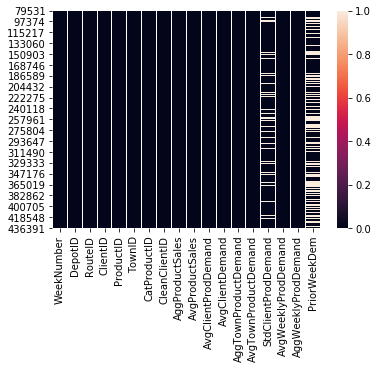

In [91]:
sns.heatmap(X_train.isna())

In [131]:
#We see that a lot of prevdemand values are null because the client, product combination has not existing before.
#But that is fine because LGBM is capabe to handling null values.

In [157]:
#Demand for Prior 4 weeks for Weeks -> 7,9
for week in range(7,10):
    for prevweek in range(2,5):
        indices = data[data['WeekNumber'] == week].index.values
        data.loc[indices,('PriorWeekDem'+ str(prevweek))] = data.reset_index().merge(data[data['WeekNumber'] == (week-prevweek)].copy().groupby(['ClientID','ProductID']).mean()['Demand'], on=['ClientID','ProductID']).set_index('index')['Demand_y']

   

In [166]:
#Using 4 weeks of lag to train the LGBM Model

In [167]:
data_new = data[data['WeekNumber'] >= 7].copy()

In [171]:
data_new.drop(["Unnamed: 0","SalesChannelID","SalesUnits","Sales","ReturnUnits","Returns","Demand"], axis=1, inplace=True)

In [172]:
X_train = data_new[data_new['WeekNumber'] != 9].copy()
y_train = X_train['normDemand']
X_test = data_new[data_new['WeekNumber'] == 9].copy()
y_test = X_test['normDemand']
X_train.drop(["normDemand"],axis=1, inplace=True)
X_test.drop(["normDemand"],axis=1, inplace=True)

In [177]:
import pickle
gbm = pickle.load(open("inventory-lgbm-model.pkl", 'rb'))

In [178]:
gbm.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.8337498258560773, importance_type='split',
              learning_rate=0.05999247474540086, max_depth=7,
              metric=['l2', 'l1'], min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=187, n_jobs=-1, num_leaves=50,
              objective='Regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=0.8404460046972835,
              subsample_for_bin=200000, subsample_freq=0)

In [179]:
pred = gbm.predict(X_test)

In [180]:
# Basic RMSLE
print('The rmse of prediction is:', round(mean_squared_error(pred, y_test) ** 0.5, 5))

The rmse of prediction is: 0.157


In [181]:
#Voila! We see that the lagged features give a great improvement in performance with the existing model. If we train again
#and generate new tuning parameters we can get even better performance. Even without that, it looks that model is good to
#predict nicely for a few weeks before retraining again on new data.

In [182]:
#Progression uptill now -> 0.38 -> 0.18243 -> 0.17791 -> 0.157

In [206]:
X_test['normDem'] = y_test

In [205]:
X_test['pred'] = pred

In [208]:
X_test[['normDem','pred']].corr()

,normDem,pred
normDem,1.000000,0.947741
pred,0.947741,1.000000


In [210]:
#We are done with feature engineering and model selection on a smaller version of the original dataset. Results look good so we 
#would be trying similar startegy for the full version. We may need some extra preprocessing and some better data saving 
#algorithms (like PCA on more correlated features). We will try to implement it using pyspark. 

In [211]:
X_test[['normDem','pred']]

,normDem,pred
index,,
454229,0.922939,0.920010
454230,1.251412,1.203254
454231,0.922939,1.052838
454232,1.508812,1.569552
454233,1.251412,1.254226
...,...,...
528493,2.083408,2.103400
528494,2.477682,2.321593
528495,1.251412,1.159009
